In [28]:
# Filter out data for the hedonic products
data_hedonic = data_hedonic[~data_hedonic['product'].isin(['Hair Treatment', 'Facial Spray','Cologne Unisex'])]


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [29]:
data_hedonic = pd.read_csv('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Total_Features_HedNew.csv')
data_utilitarian = pd.read_csv('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Total_Features_utilitarian.csv')

In [22]:
data = pd.read_csv('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/TestData_wSubjective.csv')
data.drop (columns = ['Unnamed: 0'], inplace = True)



In [23]:
features = [
    'rating', 'average_rating','rat_count','ver_purch', 'sentiment', 'price', '#adj', '#adv',
    '#nouns', 'word_count', 'sent_count', 'sent_length', 
    'title_length', 'review_ext', 'elap_days', 
    'image', 'year', 'month', 'day', 'hour','FRE', 'subjective_score',
]

# Product Analysis

In [24]:
# Assuming df is your DataFrame containing the 'Product' column

# Get the unique products
unique_products = data['product'].unique()

# Print the unique products
print("Unique Products:")
for product in unique_products:
    print(product)


Unique Products:
Face Oil
Mario Game
Minecraft Game
Men Cologne
Heat Protector
Chocolate
Music
Toilet Paper Unscented
Battery
Filter
Gaming Mouse
Hair Brush


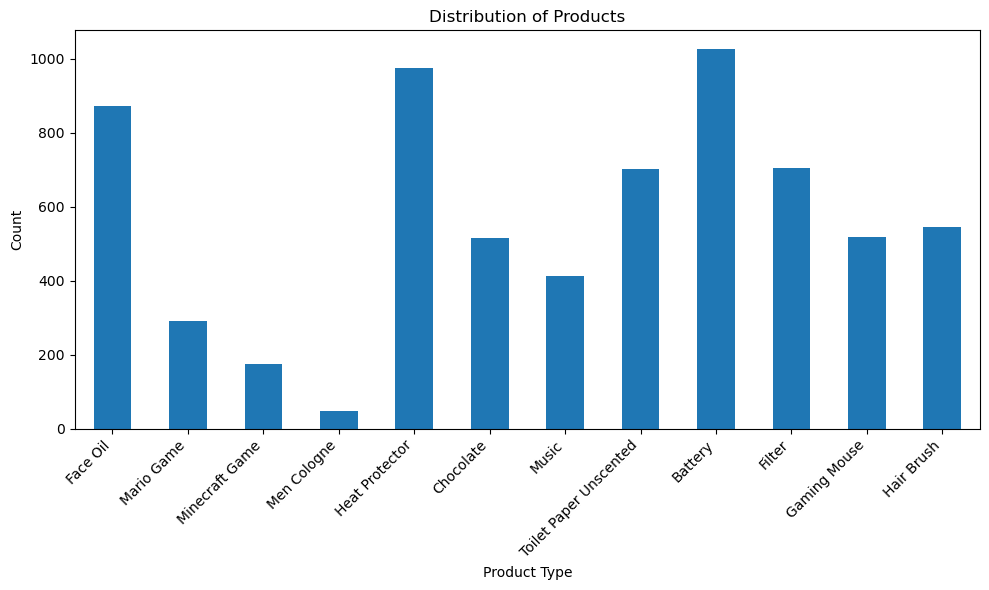

In [25]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the product data
unique_products = ['Face Oil', 'Mario Game', 'Minecraft Game', 'Men Cologne', 
                   'Heat Protector', 'Chocolate', 'Music', 'Toilet Paper Unscented', 
                   'Battery', 'Filter', 'Gaming Mouse', 'Hair Brush']

product_counts = data['product'].value_counts().reindex(unique_products, fill_value=0)

plt.figure(figsize=(10, 6))
product_counts.plot(kind='bar')
plt.title('Distribution of Products')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [26]:
data_n = data[~data['product'].isin(['Heat Protector', 'Toilet Paper Unscented', 'Hair Brush'])]


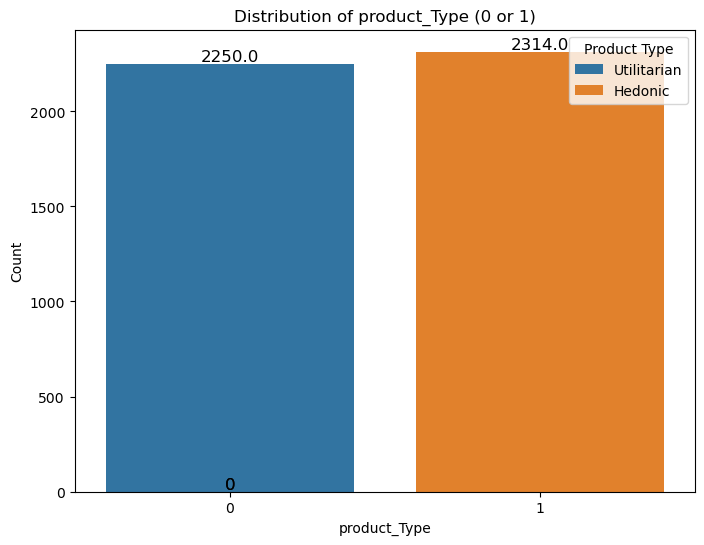

In [27]:
import seaborn as sns

# Assuming df is your DataFrame with the product_Type column
plt.figure(figsize=(8, 6))
sns.countplot(data=data_n, x='prod_type', hue='prod_type')
plt.title('Distribution of product_Type (0 or 1)')
plt.xlabel('product_Type')
plt.ylabel('Count')
plt.xticks([0, 1], ['0', '1'])

# Add count labels on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                        textcoords='offset points')

plt.legend(title='Product Type', labels=['Utilitarian', 'Hedonic'])
plt.show()


In [14]:
import scipy.stats as stats

# Define your features
features = [
    'rating', 'average_rating', 'sentiment', 'price', '#adj', '#adv',
    '#nouns', 'word_count', 'sent_count', 'sent_length', 
    'title_length', 'review_ext', 'elap_days', 
    'image', 'FRE', 'subjective_score',
]

# Perform statistical testing for each feature
for feature in features:
    prod_type_0 = data[data['prod_type'] == 0][feature]
    prod_type_1 = data[data['prod_type'] == 1][feature]
    t_stat, p_value = stats.ttest_ind(prod_type_0, prod_type_1)
    if p_value < 0.05:  # Considering statistical significance at alpha = 0.05
        print(f"Feature: {feature}")
        print(f"T-statistic: {t_stat}, p-value: {p_value}")
        print()


Feature: rating
T-statistic: -16.77703023330372, p-value: 6.284515848100909e-62

Feature: average_rating
T-statistic: -5.7140808327507875, p-value: 1.1497590841086074e-08

Feature: sentiment
T-statistic: -17.841637807576607, p-value: 1.2841688713815747e-69

Feature: price
T-statistic: 9.558053395556096, p-value: 1.6384322988280806e-21

Feature: #adj
T-statistic: -3.683244699621527, p-value: 0.00023207539293034832

Feature: #adv
T-statistic: 4.425954542171922, p-value: 9.751948516751872e-06

Feature: word_count
T-statistic: 4.96752761080383, p-value: 6.94710990045731e-07

Feature: sent_count
T-statistic: 2.0503513459100193, p-value: 0.0403685033314488

Feature: sent_length
T-statistic: 6.280704237469077, p-value: 3.578811187318452e-10

Feature: title_length
T-statistic: -4.367571848354282, p-value: 1.275039463119759e-05

Feature: review_ext
T-statistic: -16.36249425526169, p-value: 4.738640391965615e-59

Feature: elap_days
T-statistic: -2.3768781297073187, p-value: 0.01748743121223076



In [28]:
import scipy.stats as stats

# Define your features
features = [
    'rating', 'average_rating', 'sentiment', 'price', '#adj', '#adv',
    '#nouns', 'word_count', 'sent_count', 'sent_length', 
    'title_length', 'review_ext', 'elap_days', 
    'image', 'FRE', 'subjective_score',
]

# Perform statistical testing for each feature
for feature in features:
    prod_type_0 = data_n[data_n['prod_type'] == 0][feature]
    prod_type_1 = data_n[data_n['prod_type'] == 1][feature]
    t_stat, p_value = stats.ttest_ind(prod_type_0, prod_type_1)
    if p_value < 0.05:  # Considering statistical significance at alpha = 0.05
        print(f"Feature: {feature}")
        print(f"T-statistic: {t_stat}, p-value: {p_value}")
        print()


Feature: rating
T-statistic: -21.80626829673379, p-value: 2.301337866030273e-100

Feature: average_rating
T-statistic: -40.917209195855214, p-value: 0.0

Feature: sentiment
T-statistic: -22.683357988242356, p-value: 5.04219084898237e-108

Feature: price
T-statistic: 8.76726402996649, p-value: 2.5424575892671804e-18

Feature: #adj
T-statistic: -7.008995564897593, p-value: 2.751744481417769e-12

Feature: #adv
T-statistic: 3.8609998583264185, p-value: 0.00011448714374514681

Feature: word_count
T-statistic: 7.475731022168131, p-value: 9.153340441215808e-14

Feature: sent_count
T-statistic: 4.476202684473148, p-value: 7.783485193035509e-06

Feature: sent_length
T-statistic: 6.943759991375806, p-value: 4.355508890981324e-12

Feature: title_length
T-statistic: -4.95579738891388, p-value: 7.464339901522699e-07

Feature: review_ext
T-statistic: -20.34479447722555, p-value: 3.785581986142885e-88

Feature: elap_days
T-statistic: 15.982335283230102, p-value: 5.478046309005427e-56

Feature: image


# Summary statistic of features

In [7]:
import pandas as pd

# Assuming df is your DataFrame with the columns mentioned
summary_stats_data = data.groupby('product').agg({
    'rating': ['mean', 'median', 'std'],
    'rat_count': ['mean', 'median', 'std'],
    'sentiment': ['mean', 'median', 'std'],
    '#adj': ['mean', 'median', 'std'],
    '#adv': ['mean', 'median', 'std'],
    '#nouns': ['mean', 'median', 'std'],
    'word_count': ['mean', 'median', 'std'],
    'sent_count': ['mean', 'median', 'std'],
    'sent_length': ['mean', 'median', 'std'],
    'title_length': ['mean', 'median', 'std'],
    'review_ext': ['mean', 'median', 'std'],
    'elap_days': ['mean', 'median', 'std'],
    'image': ['mean', 'median', 'std'],
    'FRE': ['mean', 'median', 'std'],
    'subjective_score': ['mean', 'median', 'std'],
})

print(summary_stats_data)


                          rating                       rat_count            \
                            mean median       std           mean    median   
product                                                                      
Battery                 2.823587    2.0  1.737132  180458.000000  180458.0   
Chocolate               3.796512    5.0  1.713246   54645.000000   54645.0   
Face Oil                4.190367    5.0  1.404601  117090.000000  117090.0   
Filter                  2.507082    1.0  1.749758   90203.000000   90203.0   
Gaming Mouse            2.569498    2.0  1.668341   46976.000000   46976.0   
Hair Brush              4.126606    5.0  1.449052   92512.000000   92512.0   
Heat Protector          3.493852    4.0  1.698253   45678.000000   45678.0   
Mario Game              3.606164    5.0  1.728783   48961.000000   48961.0   
Men Cologne             3.854167    5.0  1.713396   50711.000000   50711.0   
Minecraft Game          4.097701    5.0  1.492445   40333.000000

In [9]:

# Assuming df is your DataFrame with the columns mentioned
summary_stats_prodType= data.groupby('prod_type').agg({
    'rating': ['mean', 'median', 'std'],
    'rat_count': ['mean', 'median', 'std'],
    'sentiment': ['mean', 'median', 'std'],
    '#adj': ['mean', 'median', 'std'],
    '#adv': ['mean', 'median', 'std'],
    '#nouns': ['mean', 'median', 'std'],
    'word_count': ['mean', 'median', 'std'],
    'sent_count': ['mean', 'median', 'std'],
    'sent_length': ['mean', 'median', 'std'],
    'title_length': ['mean', 'median', 'std'],
    'review_ext': ['mean', 'median', 'std'],
    'elap_days': ['mean', 'median', 'std'],
    'image': ['mean', 'median', 'std'],
    'FRE': ['mean', 'median', 'std'],
    'subjective_score': ['mean', 'median', 'std'],
})

print(summary_stats_prodType)


             rating                       rat_count                         \
               mean median       std           mean   median           std   
prod_type                                                                    
0          2.981407    3.0  1.762411  117770.815217  92512.0  46499.064643   
1          3.684802    5.0  1.686617   64983.627660  48961.0  31729.901378   

          sentiment                       #adj  ...   elap_days     image  \
               mean median       std      mean  ...         std      mean   
prod_type                                       ...                         
0          2.006865    2.0  1.808882  0.094645  ...  958.126138  0.070080   
1          2.759878    4.0  1.658455  0.101453  ...  843.181847  0.119453   

                                  FRE                     subjective_score  \
          median       std       mean    median       std             mean   
prod_type                                                          

# 1. Correlation Analysis with output variable helpful-ratio

In [4]:
data = pd.concat([data_hedonic, data_utilitarian], ignore_index=True)

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


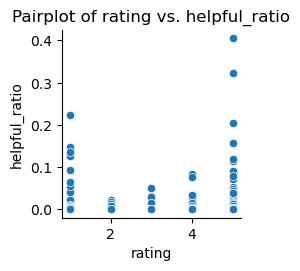

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


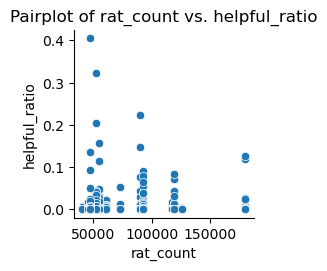

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


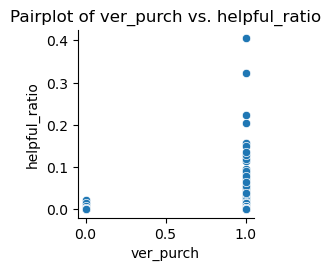

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


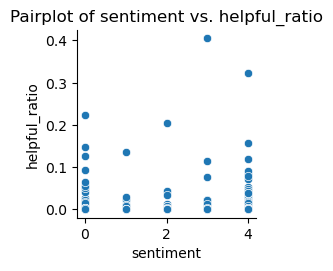

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


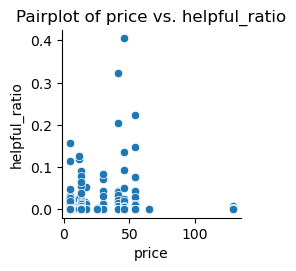

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


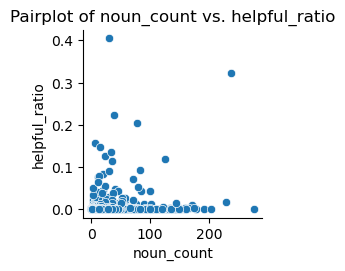

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


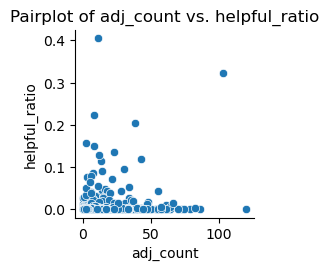

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


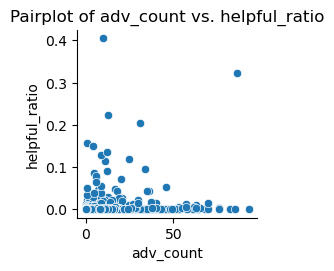

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


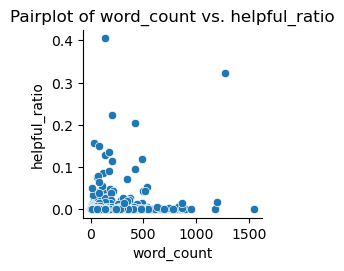

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


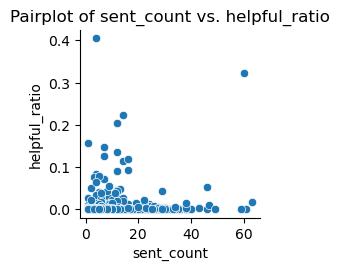

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


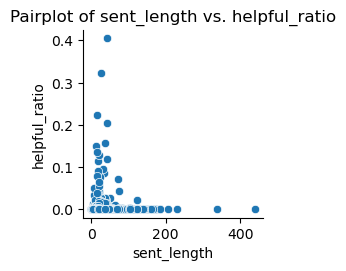

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


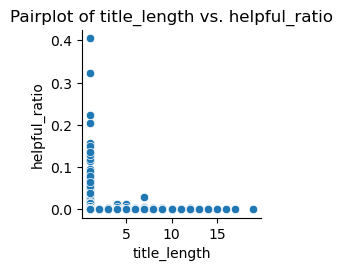

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


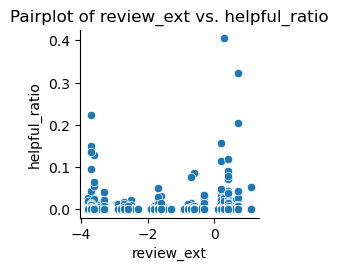

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


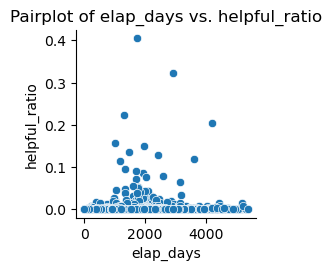

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


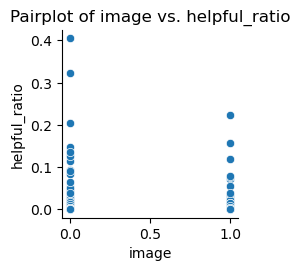

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


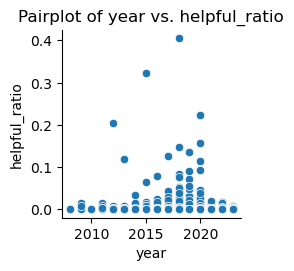

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


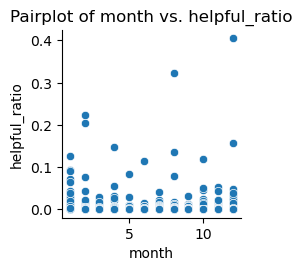

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


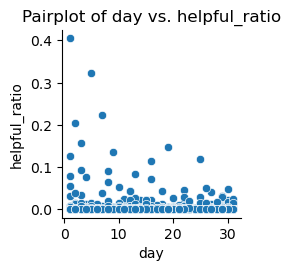

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


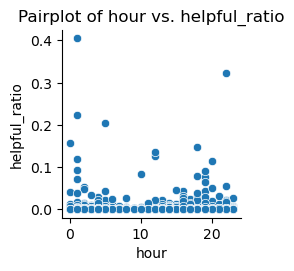

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


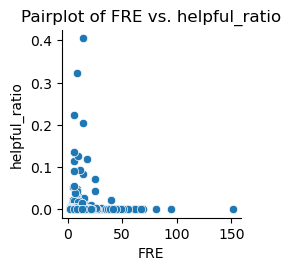

helpful_ratio    1.000000
noun_count       0.132435
word_count       0.131526
adj_count        0.118247
adv_count        0.106925
sent_count       0.104701
sent_length      0.041621
image            0.039101
FRE              0.016858
elap_days        0.015705
price            0.004422
ver_purch        0.003092
month            0.002747
title_length    -0.006379
rat_count       -0.006489
hour            -0.006946
day             -0.012127
rating          -0.013841
sentiment       -0.014520
review_ext      -0.014833
year            -0.015877
Name: helpful_ratio, dtype: float64


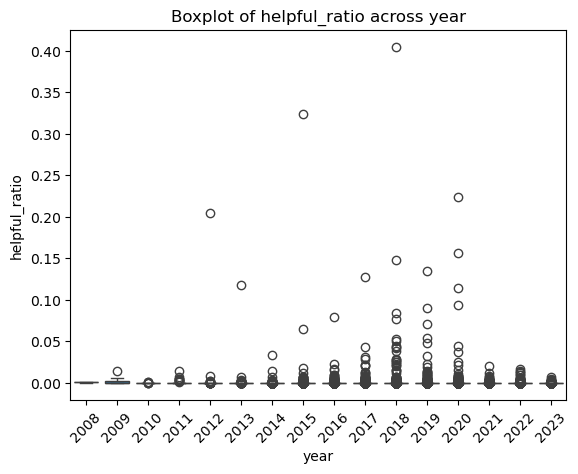

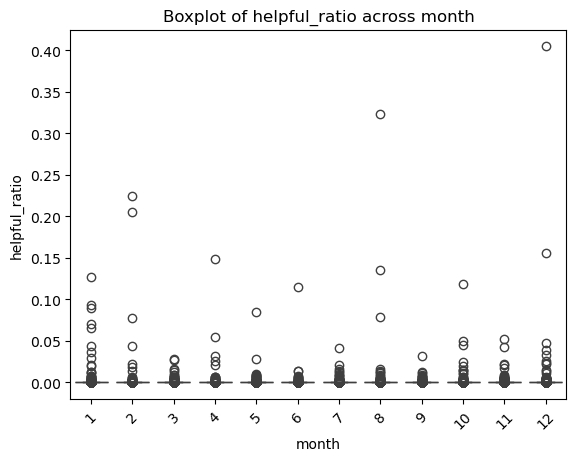

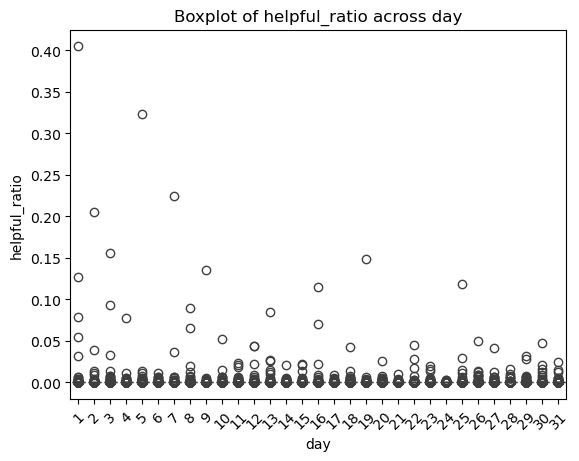

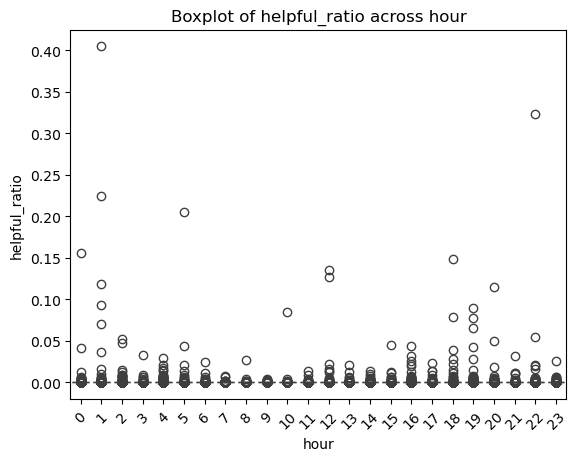

In [5]:
# Starting with simple scatterplots to analyze linear relationship (Correlation between features and output variable)

# Pairplot: Visualizing pairwise relationships between features and the output variable
for covariate in features:
    sns.pairplot(data, x_vars=[covariate], y_vars=['helpful_ratio'])
    plt.title(f'Pairplot of {covariate} vs. helpful_ratio')
    plt.show()

# Correlation between features and output variable
corr_with_output = data[features + ['helpful_ratio']].corr()['helpful_ratio'].sort_values(ascending=False)
print(corr_with_output)

# Boxplot: Visualizing the distribution of the output variable across different levels of categorical features
categorical_features = ['year', 'month', 'day', 'hour']  # Assuming these are categorical
for feature in categorical_features:
    sns.boxplot(x=feature, y='helpful_ratio', data=data)
    plt.title(f'Boxplot of helpful_ratio across {feature}')
    plt.xticks(rotation=45)
    plt.show()

# These are basic examples. Depending on your dataset, you might perform more specific analyses.


# Analysis for each data set

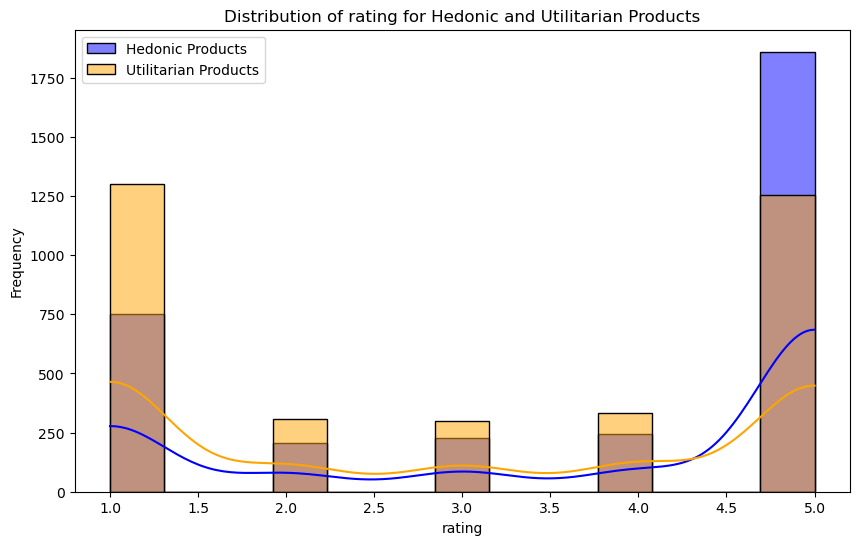

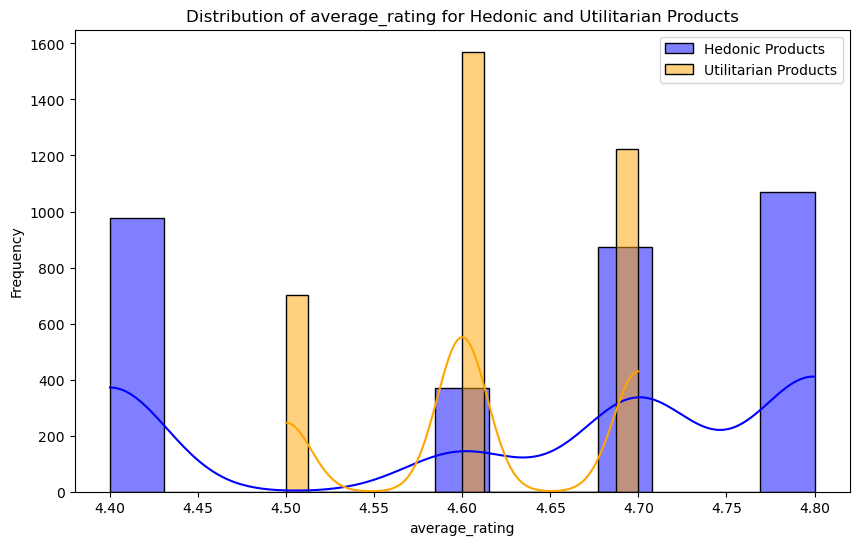

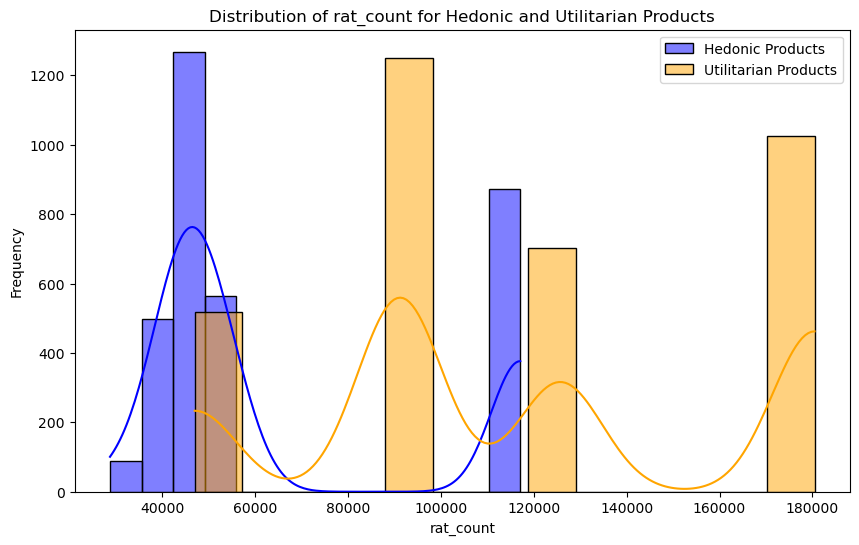

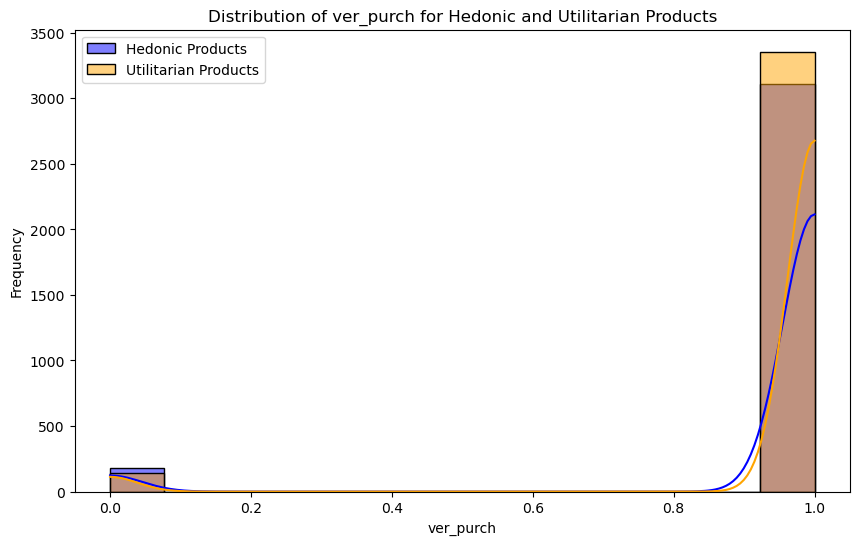

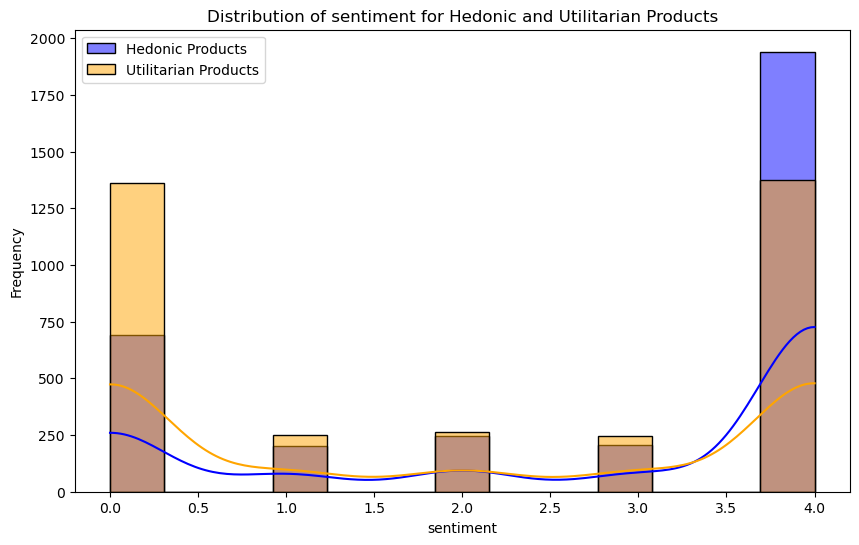

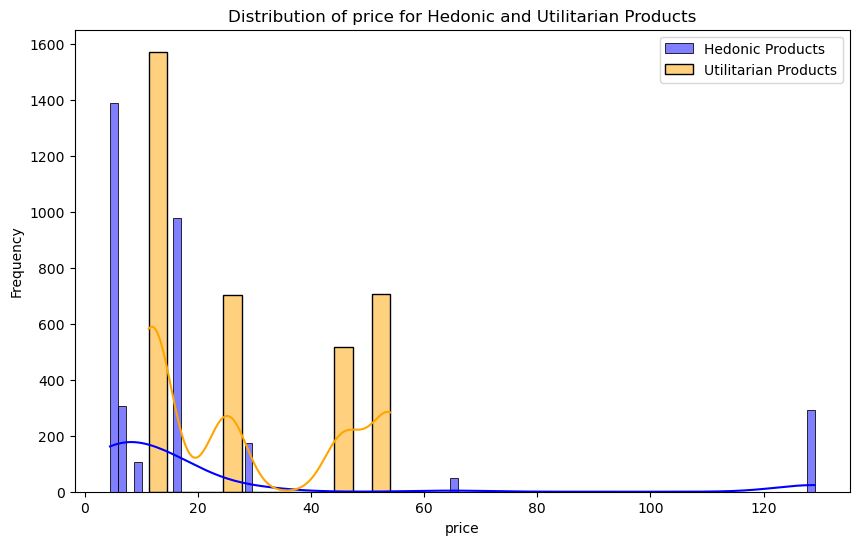

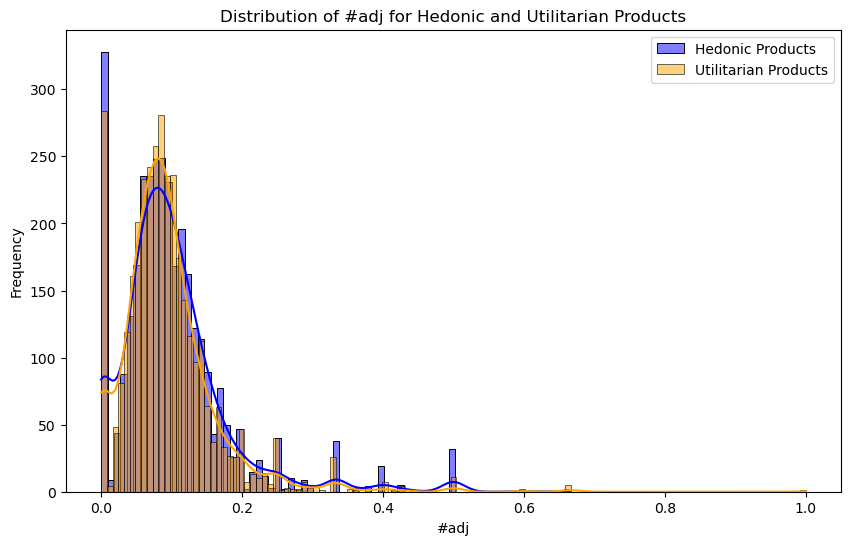

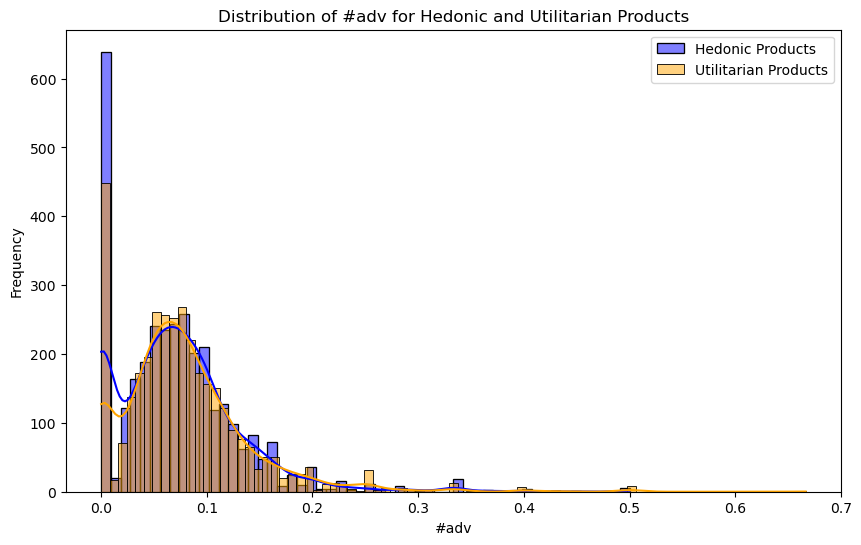

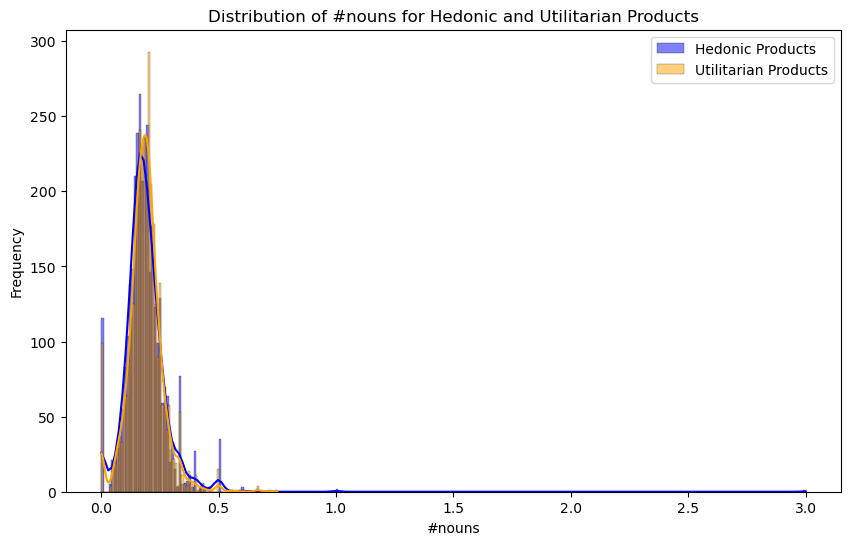

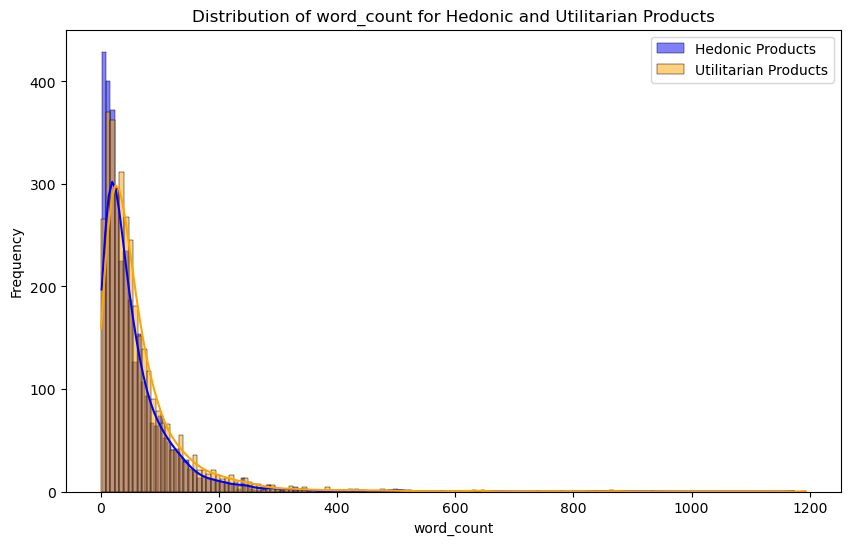

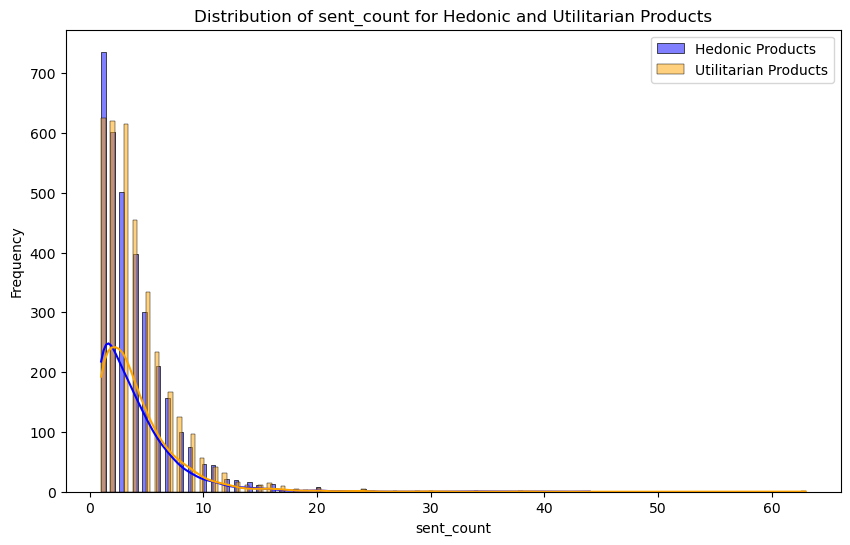

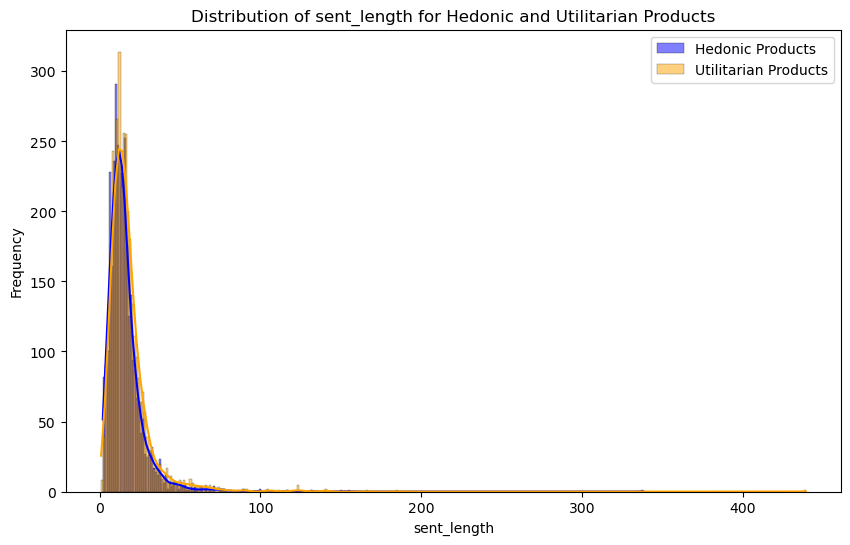

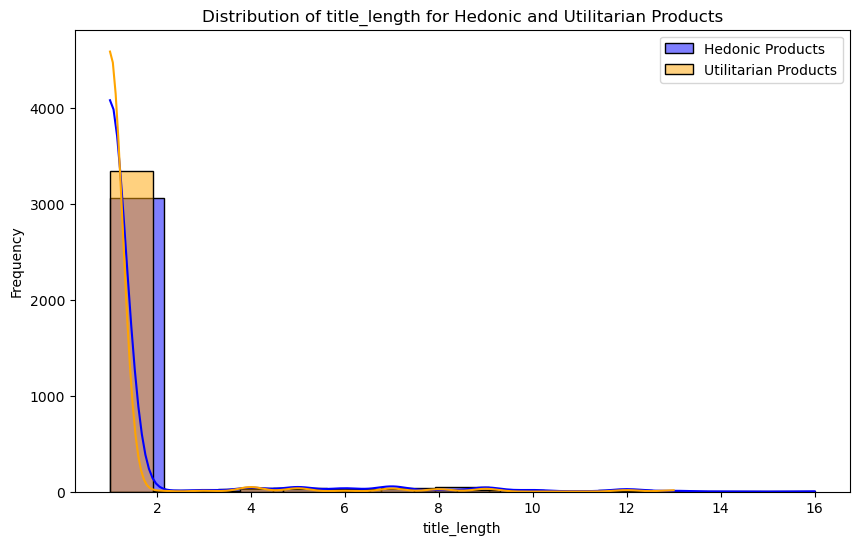

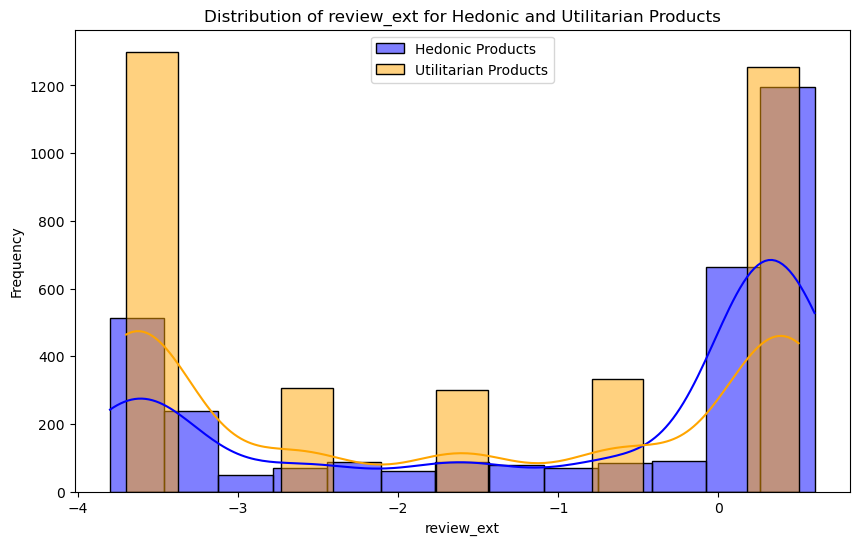

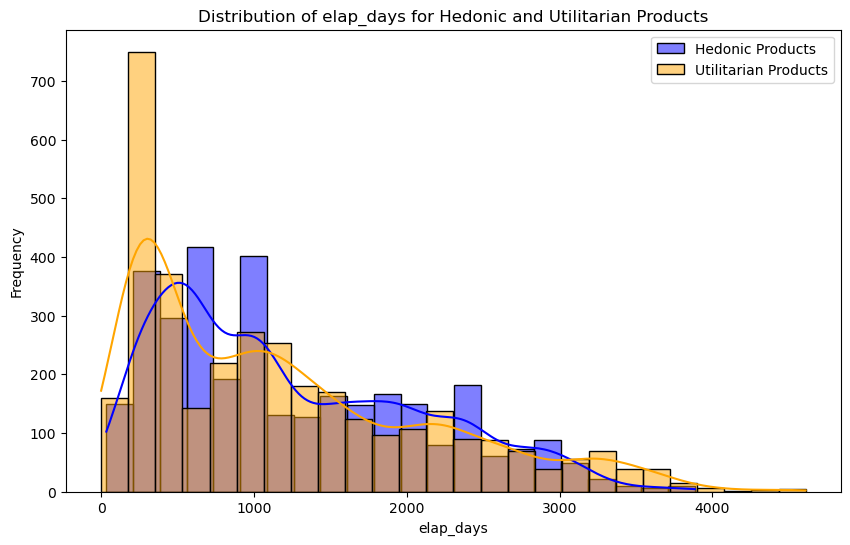

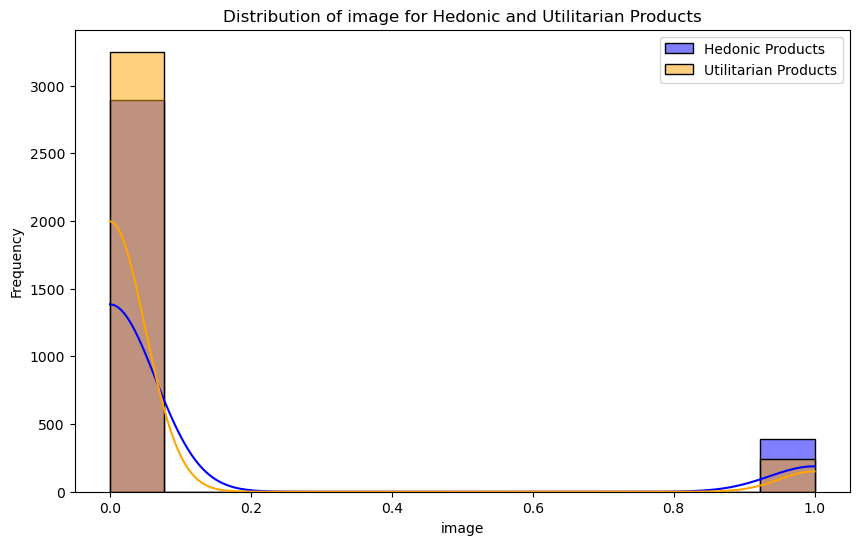

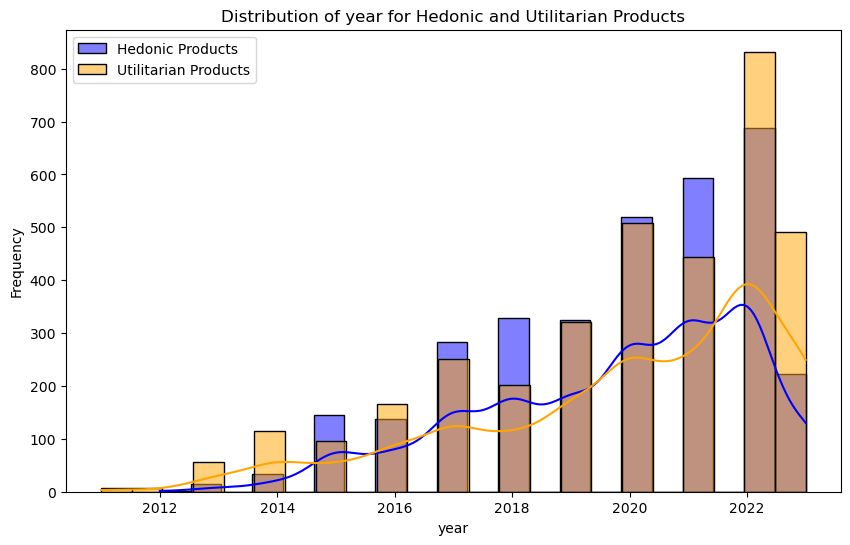

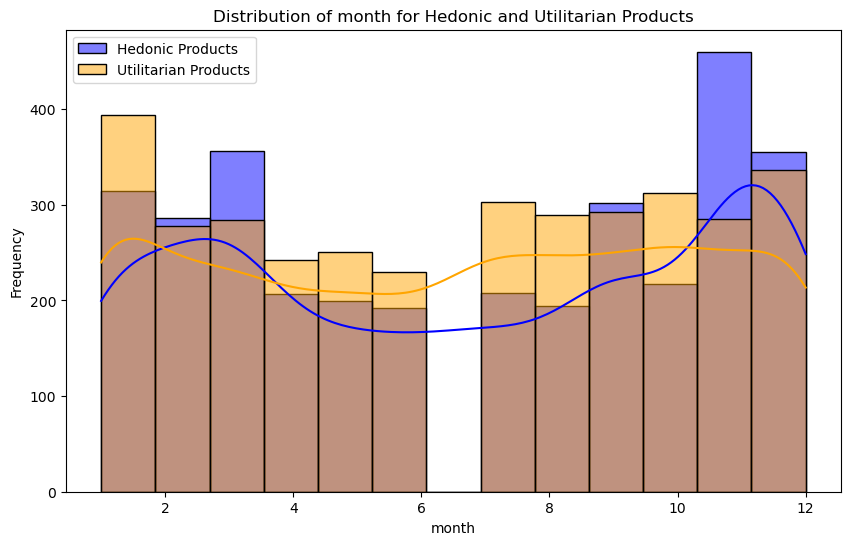

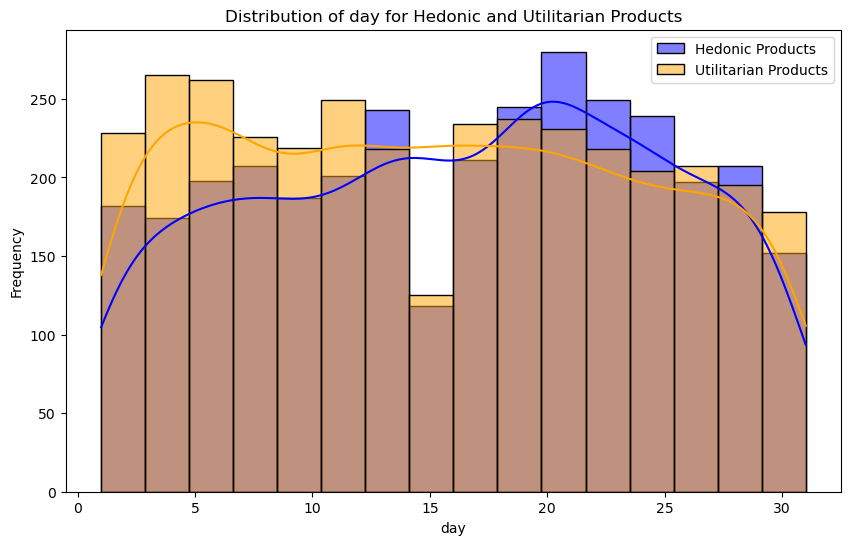

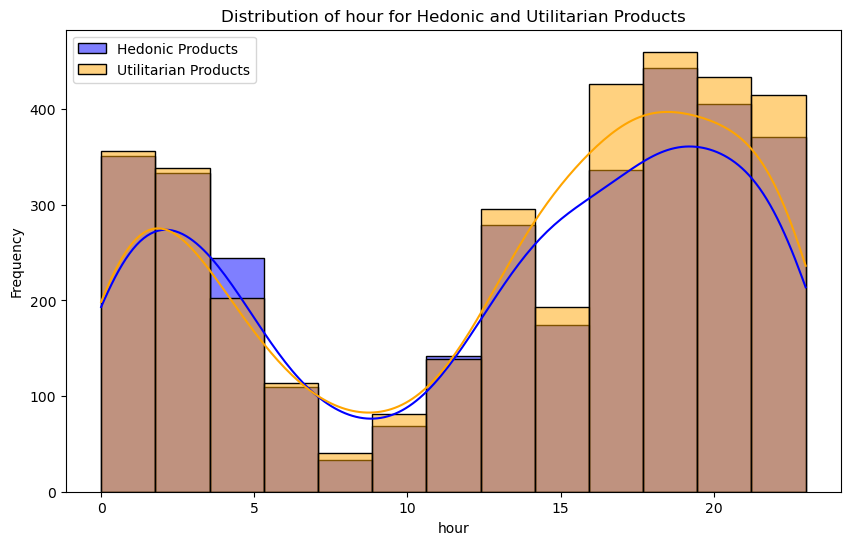

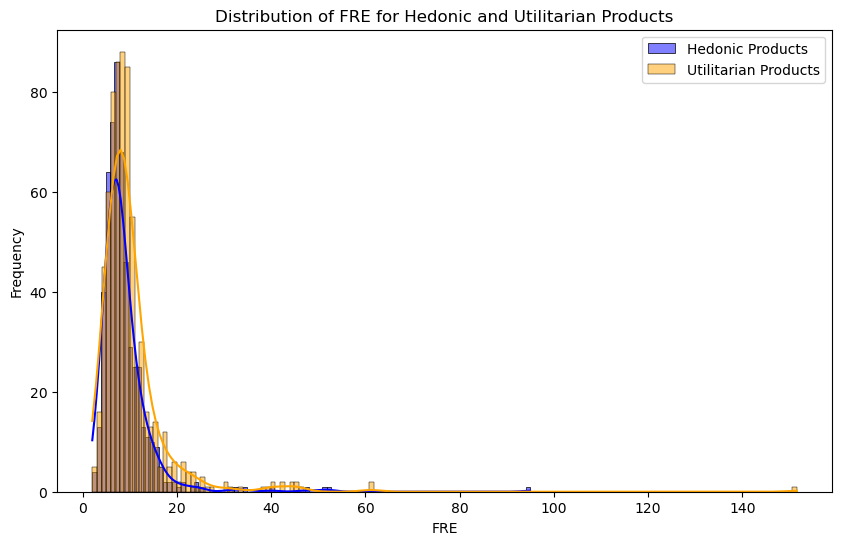

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features of interest
features = [
    'rating', 'average_rating','rat_count','ver_purch', 'sentiment', 'price', '#adj', '#adv',
    '#nouns', 'word_count', 'sent_count', 'sent_length', 
    'title_length', 'review_ext', 'elap_days', 
    'image', 'year', 'month', 'day', 'hour','FRE'
]

# Subset the data to include only hedonic products
hedonic_data = data_hedonic[data_hedonic['helpful_vote'] != 0]

# Subset the data to include only utilitarian products
utilitarian_data = data_utilitarian[data_utilitarian['helpful_vote'] != 0]

# Visualize the distribution of each feature for both hedonic and utilitarian products
for feature in features:
    plt.figure(figsize=(10, 6))
    
    # Plot histogram for hedonic products
    sns.histplot(hedonic_data[feature], color='blue', kde=True, label='Hedonic Products')
    
    # Plot histogram for utilitarian products
    sns.histplot(utilitarian_data[feature], color='orange', kde=True, label='Utilitarian Products')
    
    plt.title(f'Distribution of {feature} for Hedonic and Utilitarian Products')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


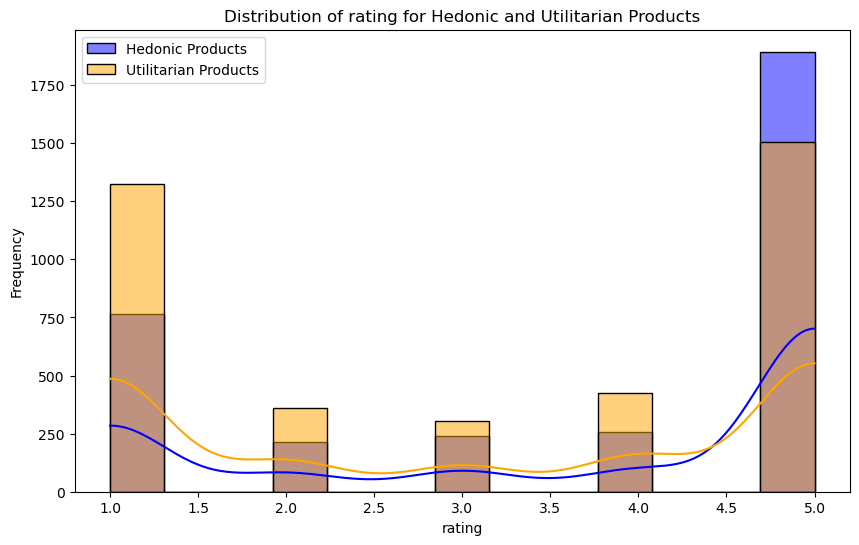

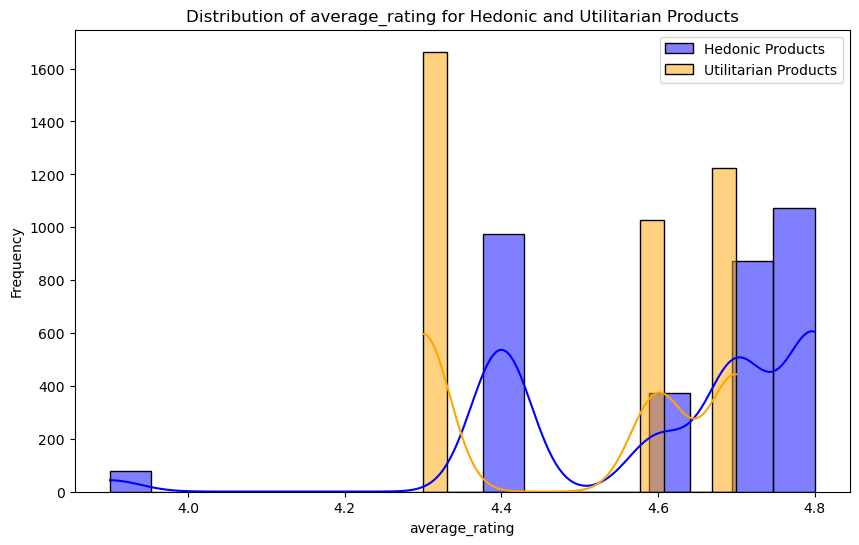

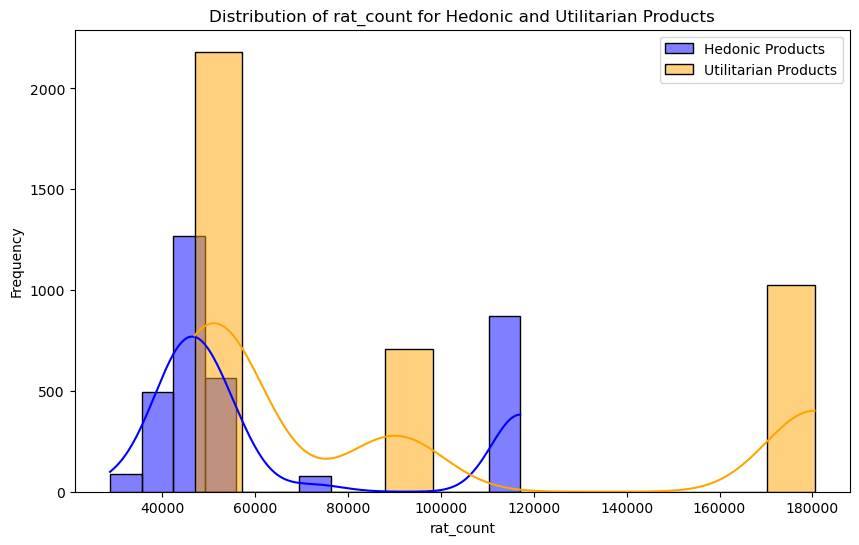

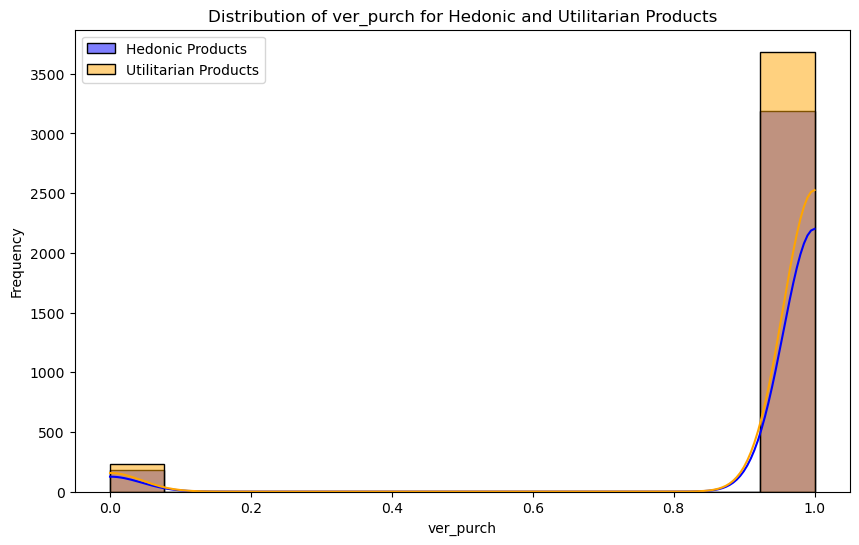

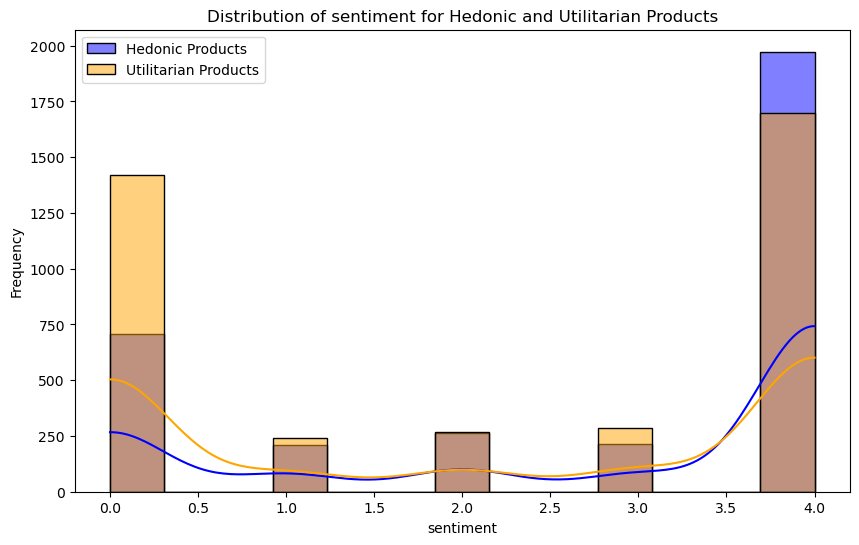

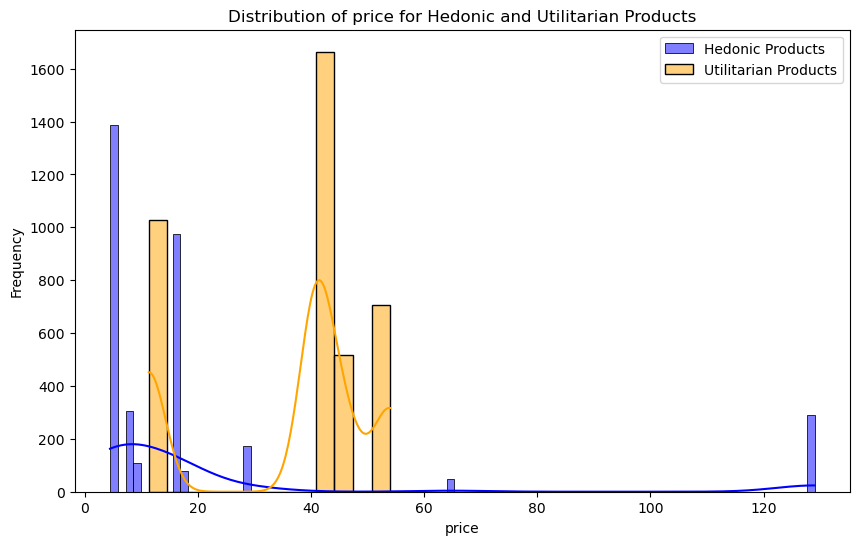

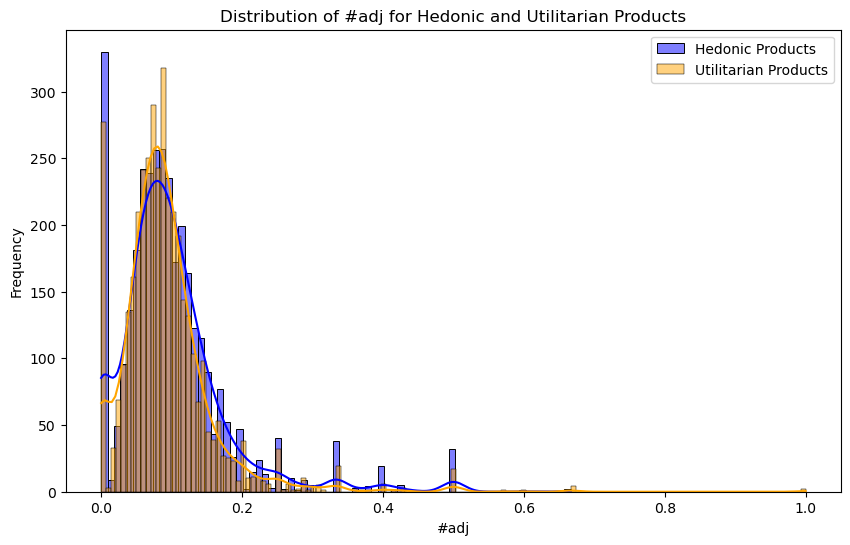

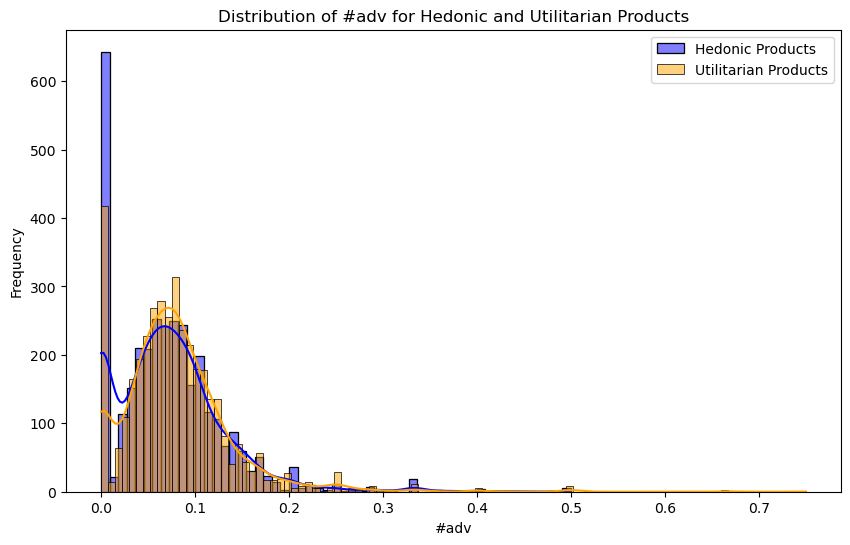

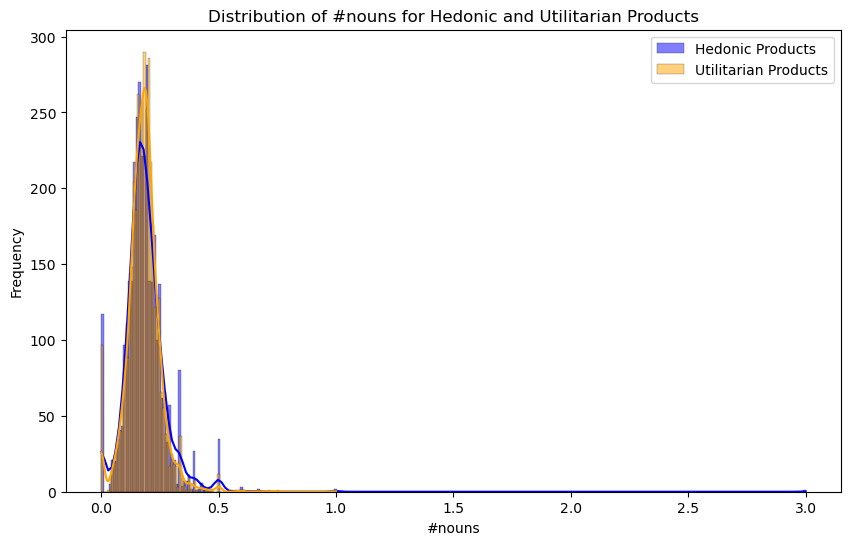

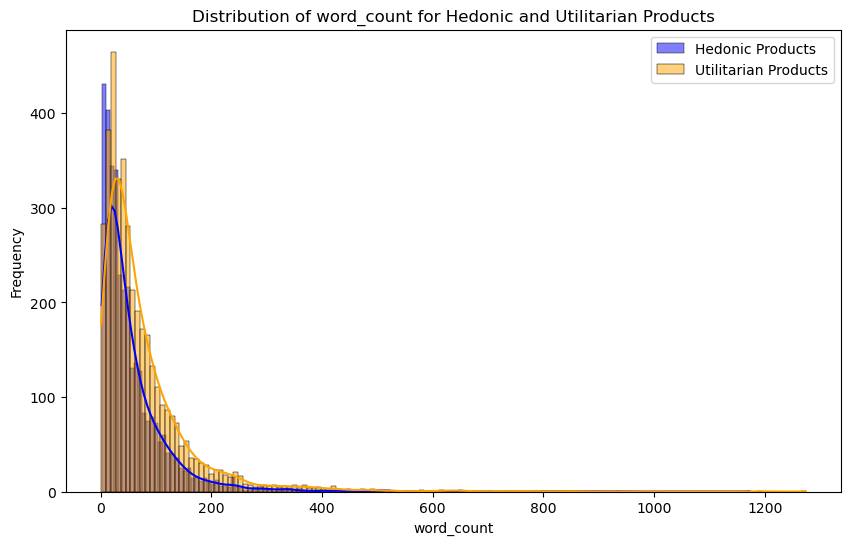

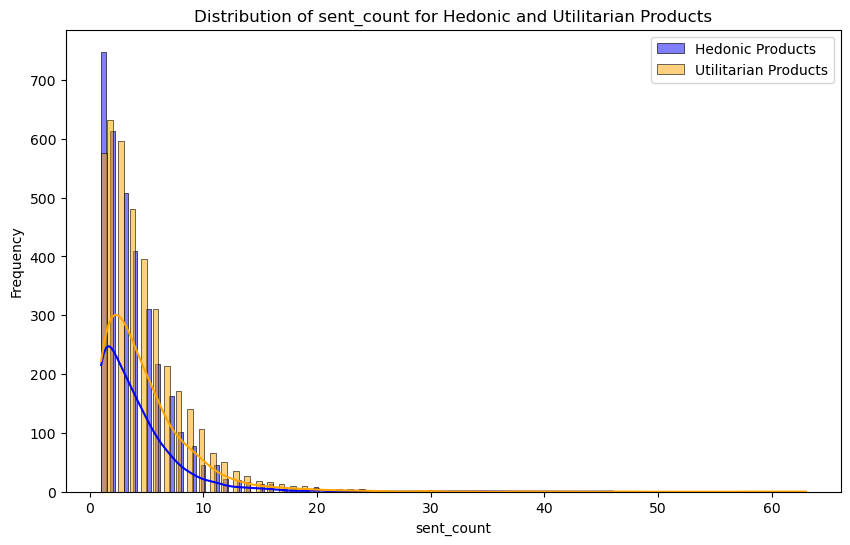

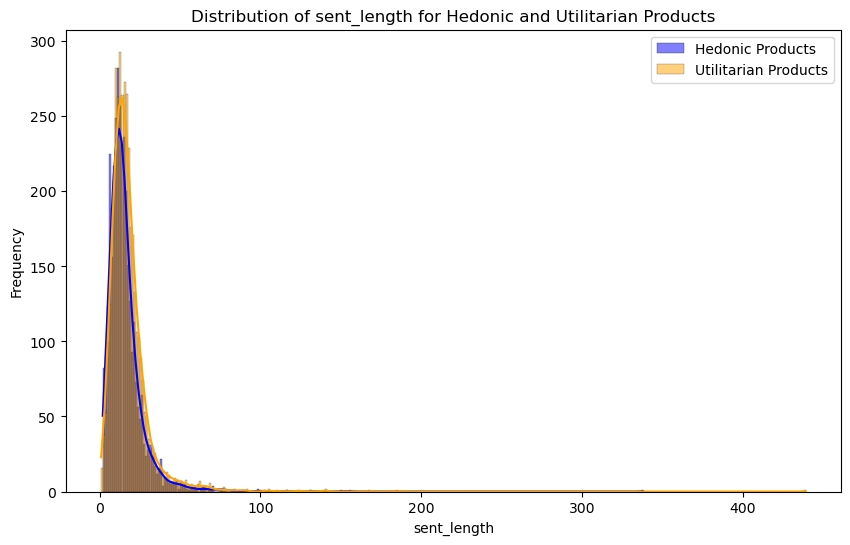

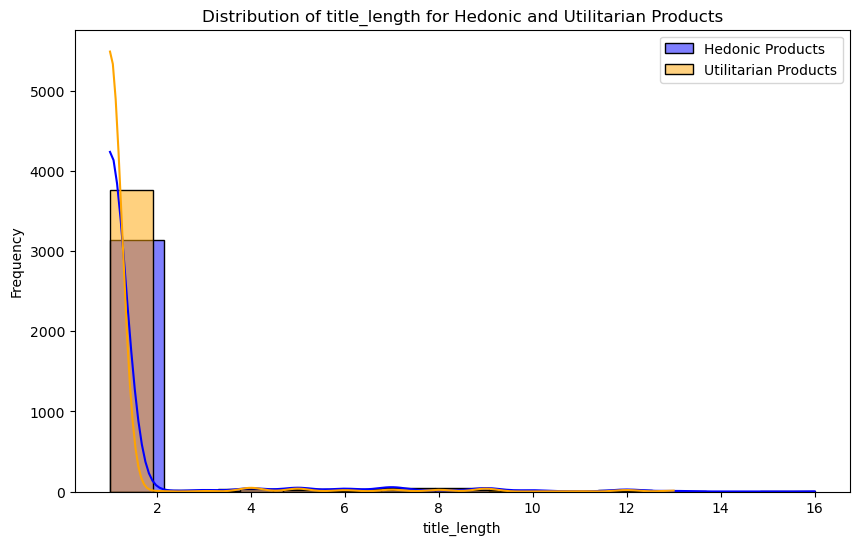

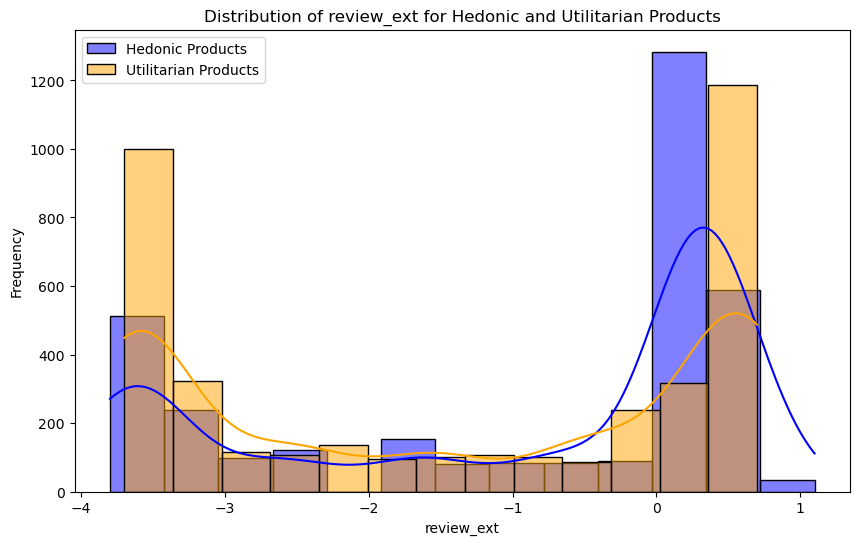

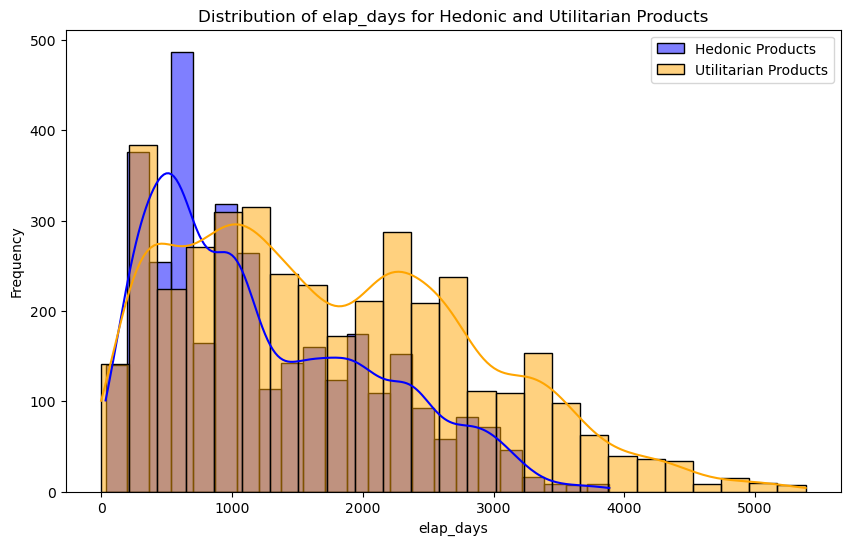

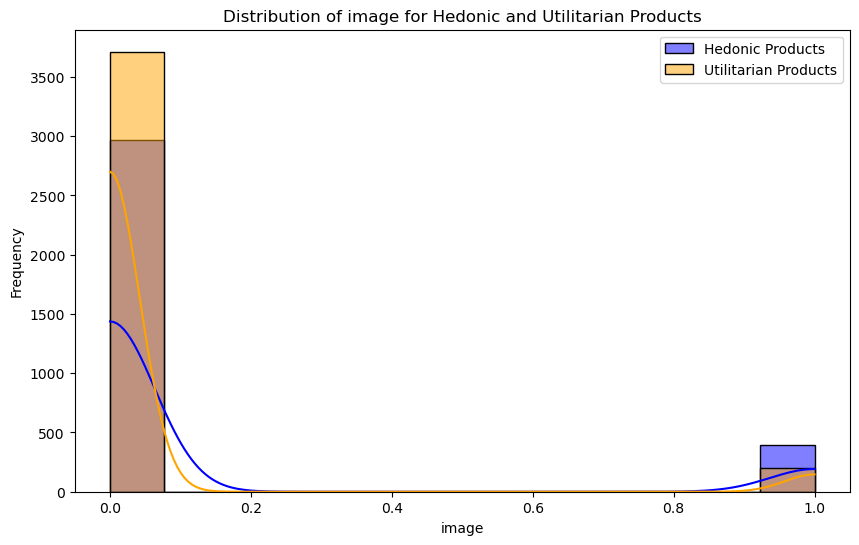

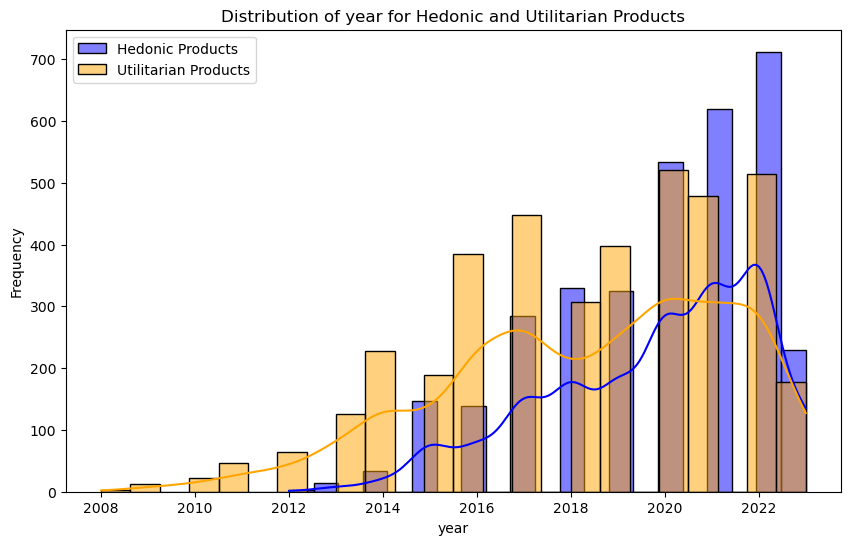

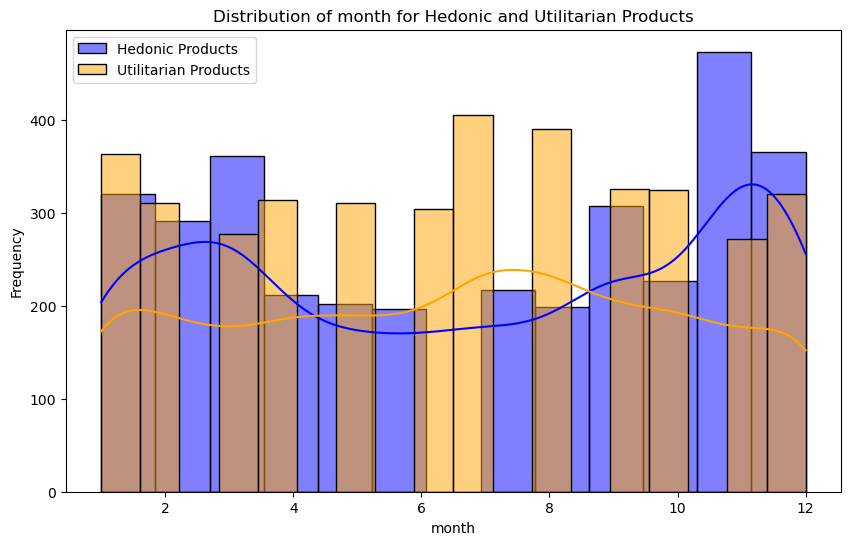

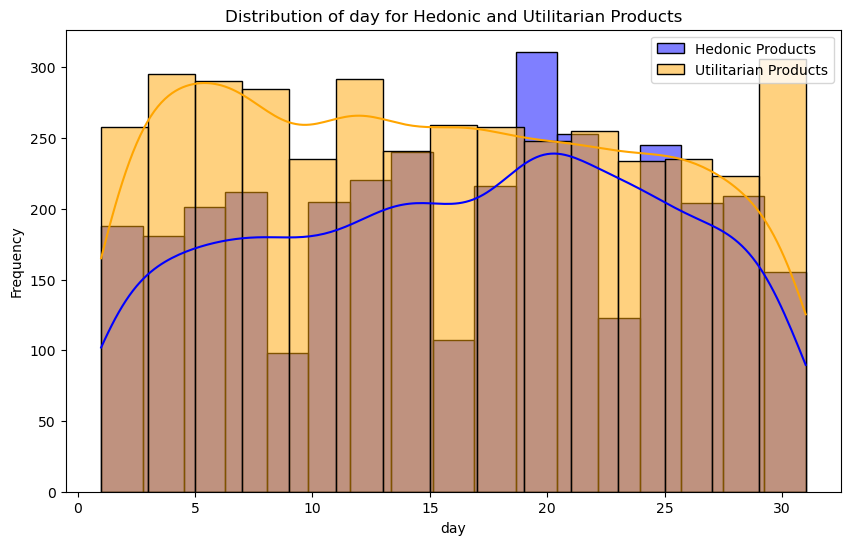

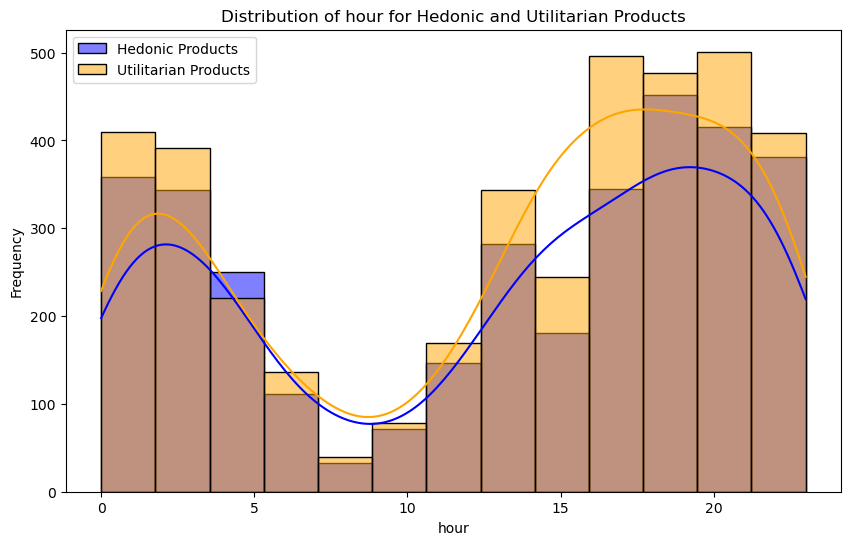

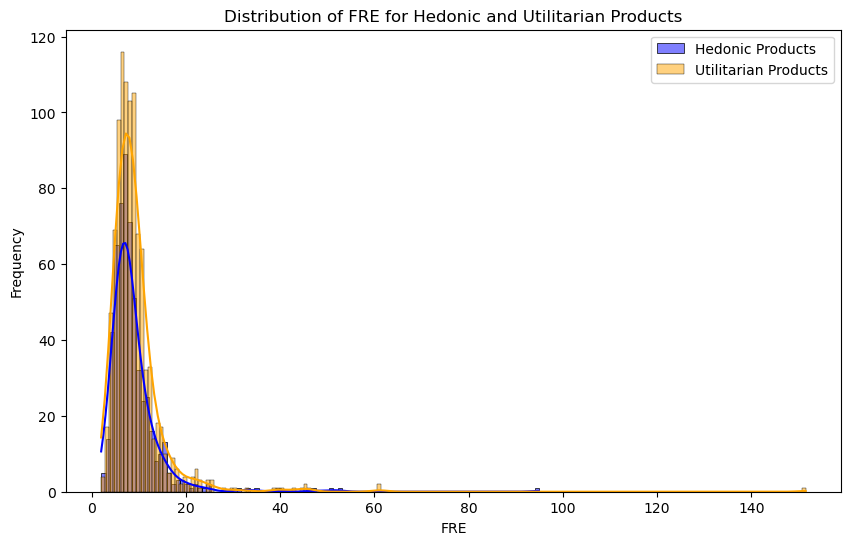

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features of interest
features = [
    'rating', 'average_rating','rat_count','ver_purch', 'sentiment', 'price', '#adj', '#adv',
    '#nouns', 'word_count', 'sent_count', 'sent_length', 
    'title_length', 'review_ext', 'elap_days', 
    'image', 'year', 'month', 'day', 'hour','FRE'
]

# Subset the data to include only hedonic products
hedonic_data = data_hedonic[data_hedonic['helpful_vote'] != 0]

# Subset the data to include only utilitarian products
utilitarian_data = data_utilitarian[data_utilitarian['helpful_vote'] != 0]

# Visualize the distribution of each feature for both hedonic and utilitarian products
for feature in features:
    plt.figure(figsize=(10, 6))
    
    # Plot histogram for hedonic products
    sns.histplot(hedonic_data[feature], color='blue', kde=True, label='Hedonic Products')
    
    # Plot histogram for utilitarian products
    sns.histplot(utilitarian_data[feature], color='orange', kde=True, label='Utilitarian Products')
    
    plt.title(f'Distribution of {feature} for Hedonic and Utilitarian Products')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

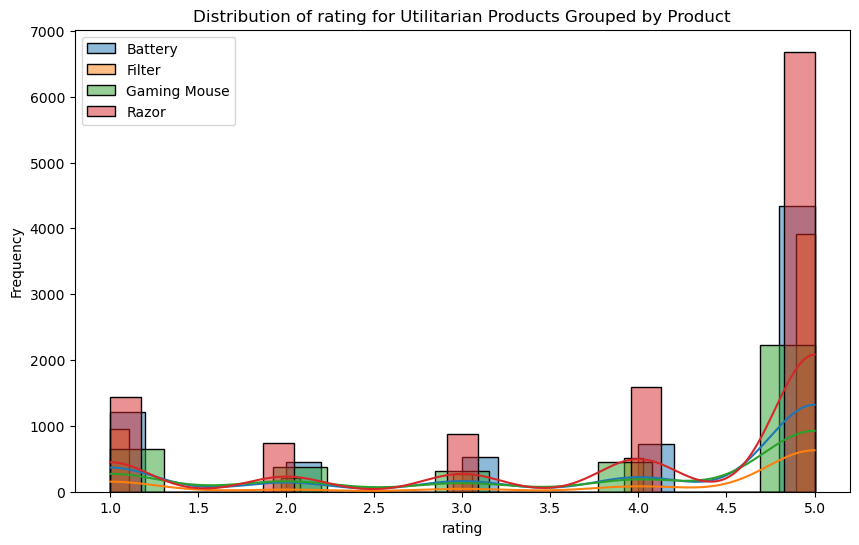

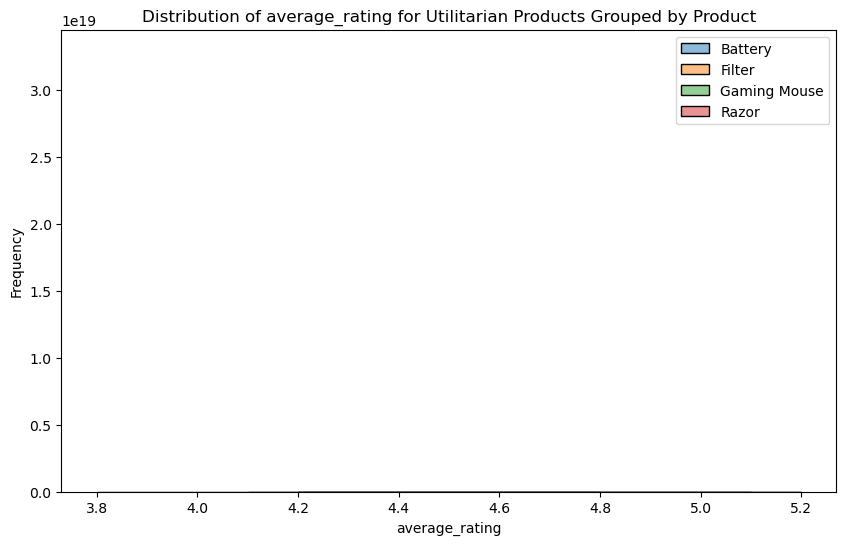

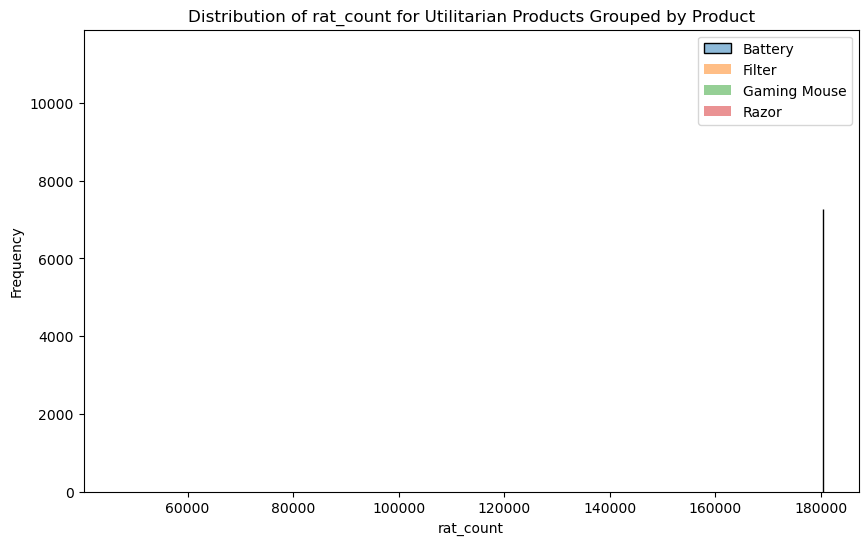

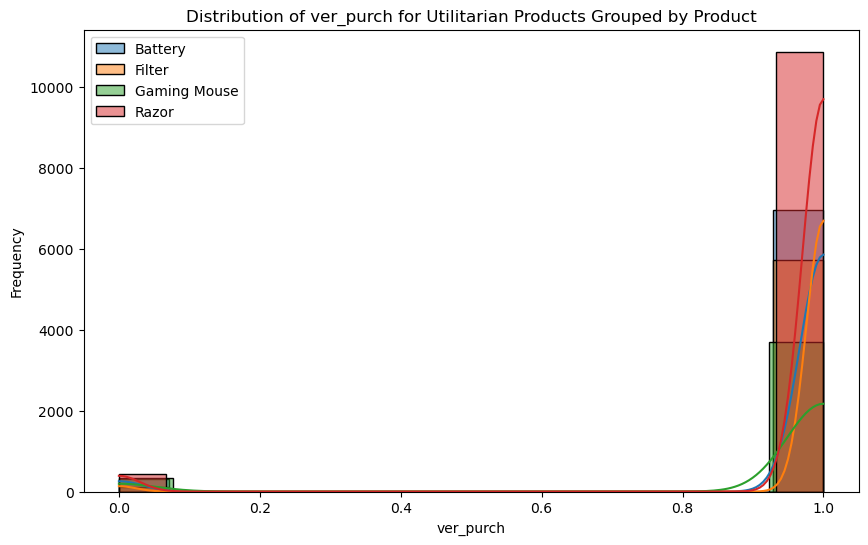

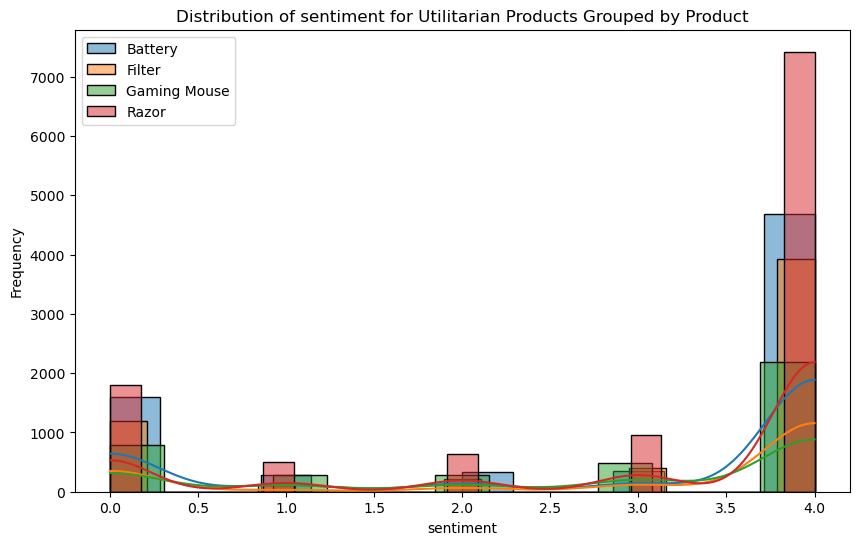

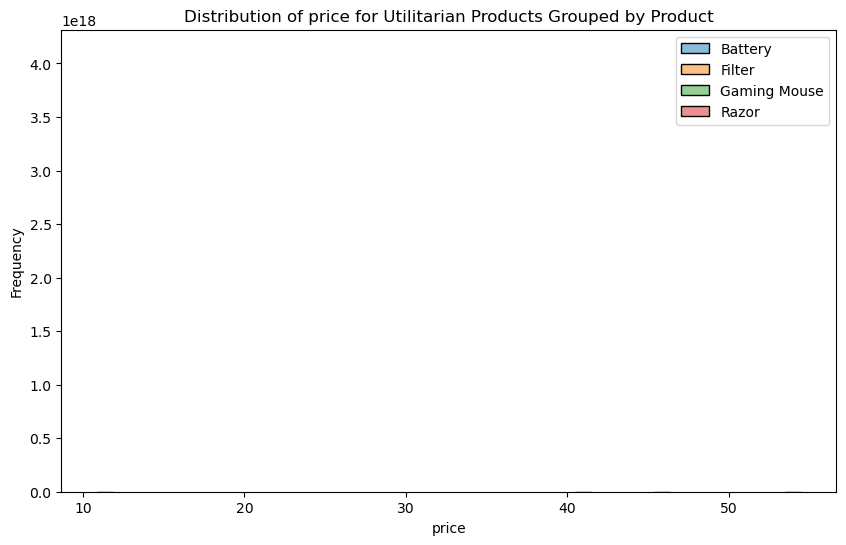

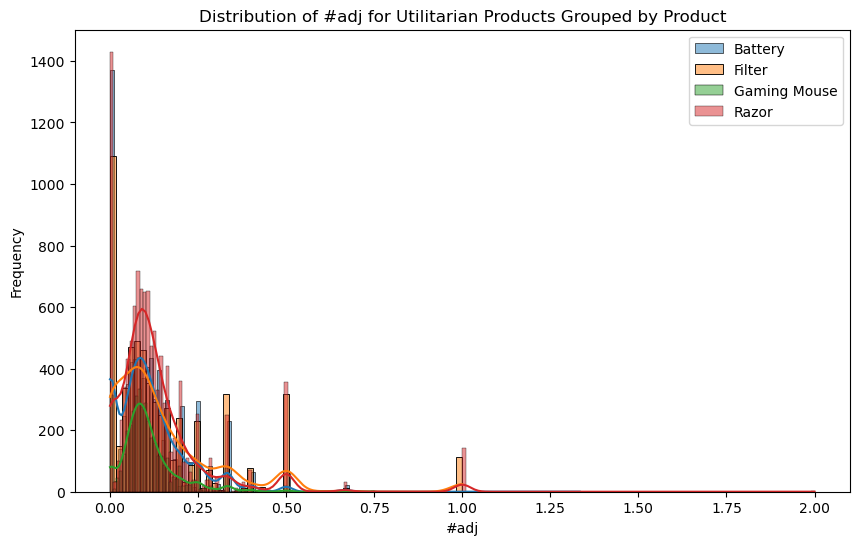

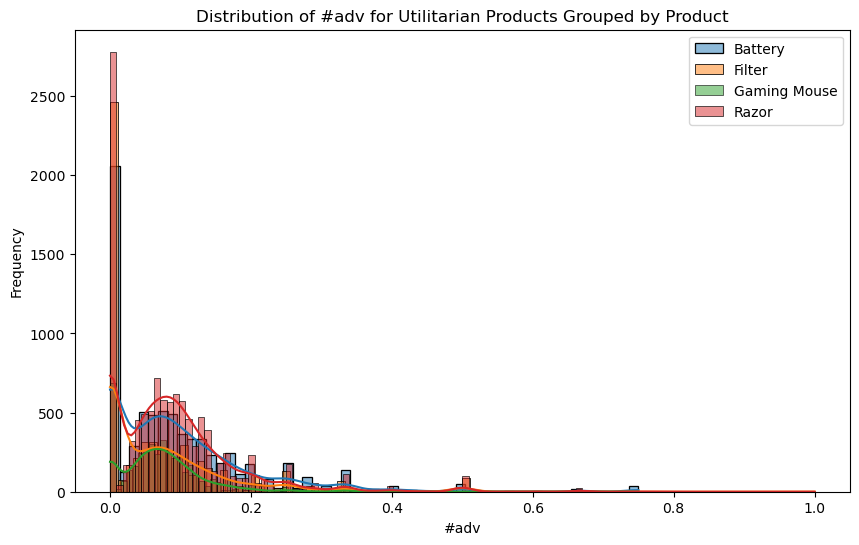

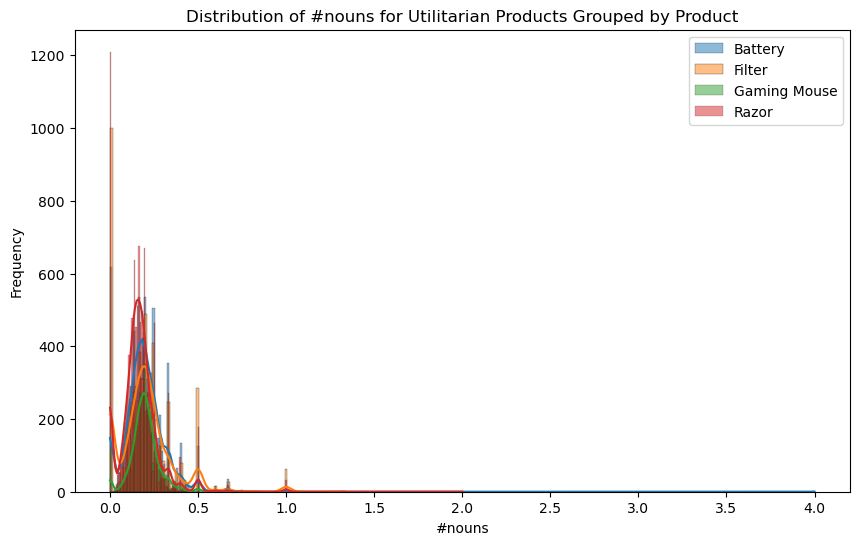

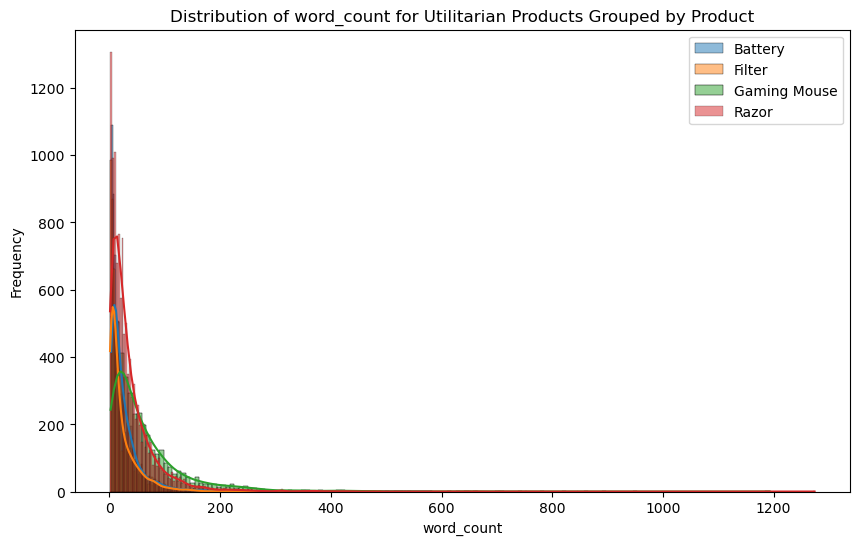

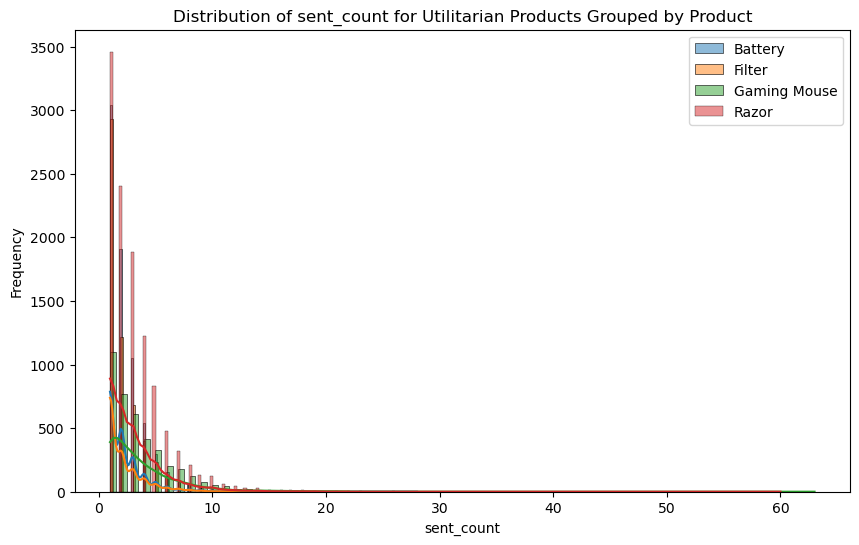

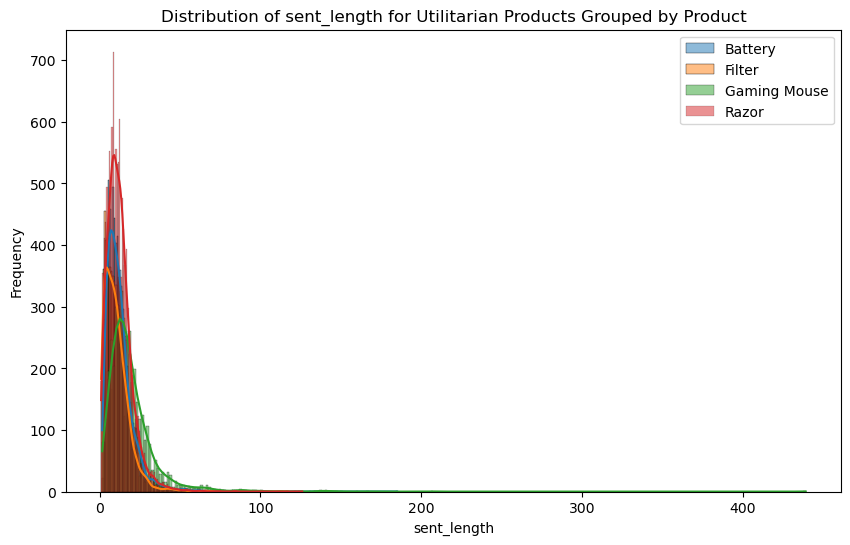

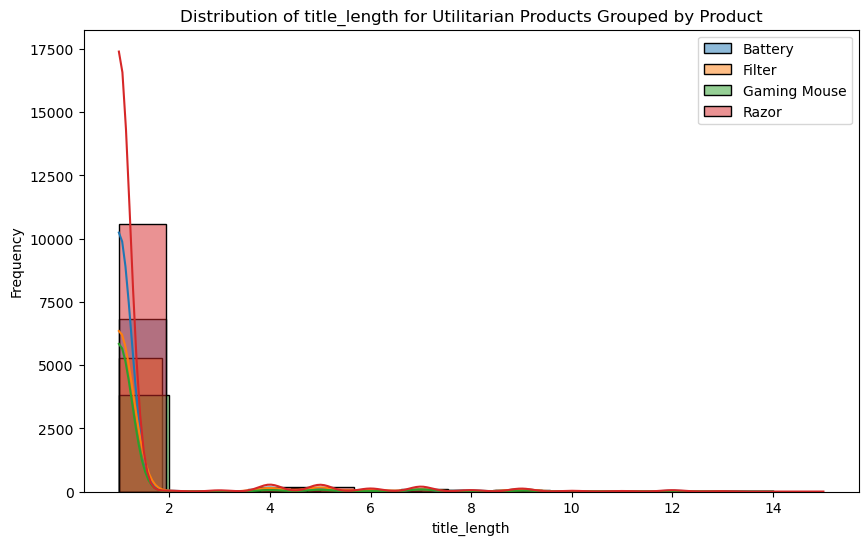

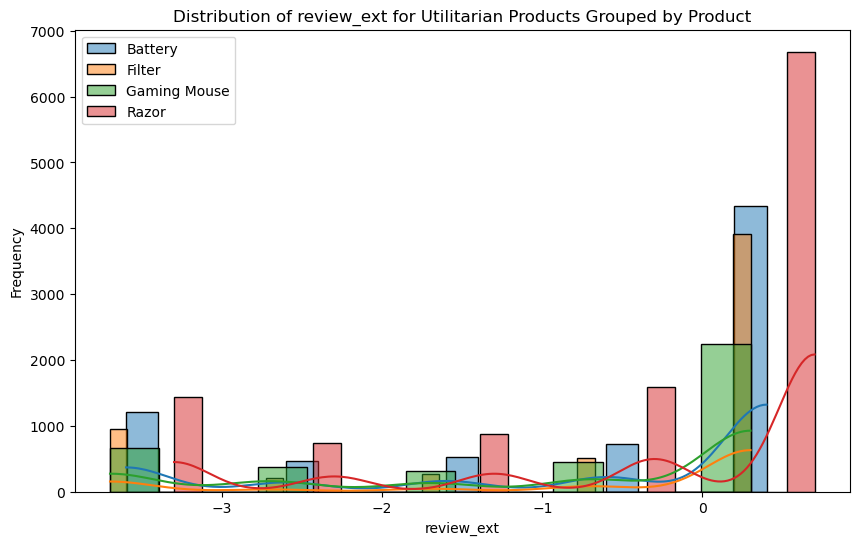

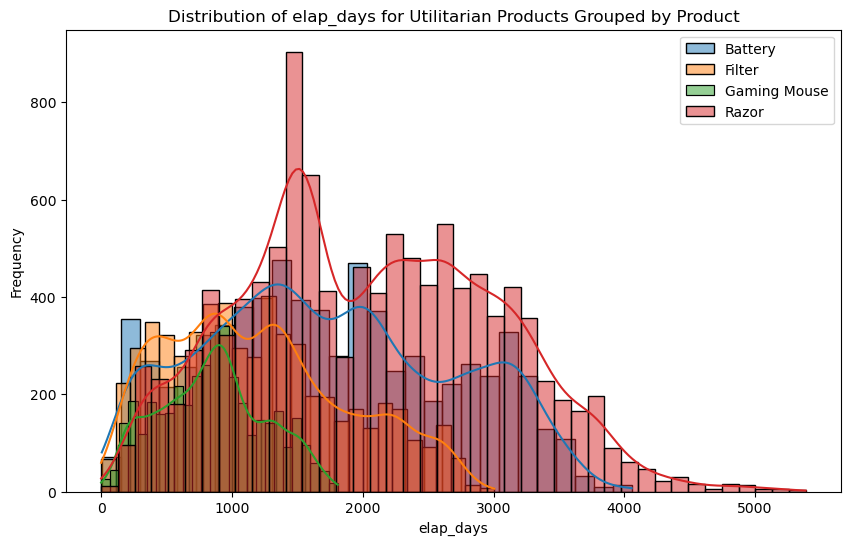

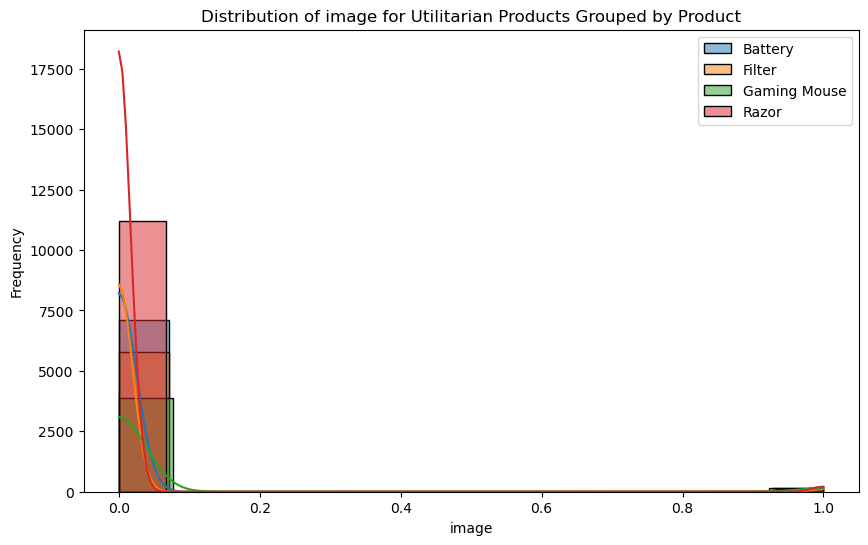

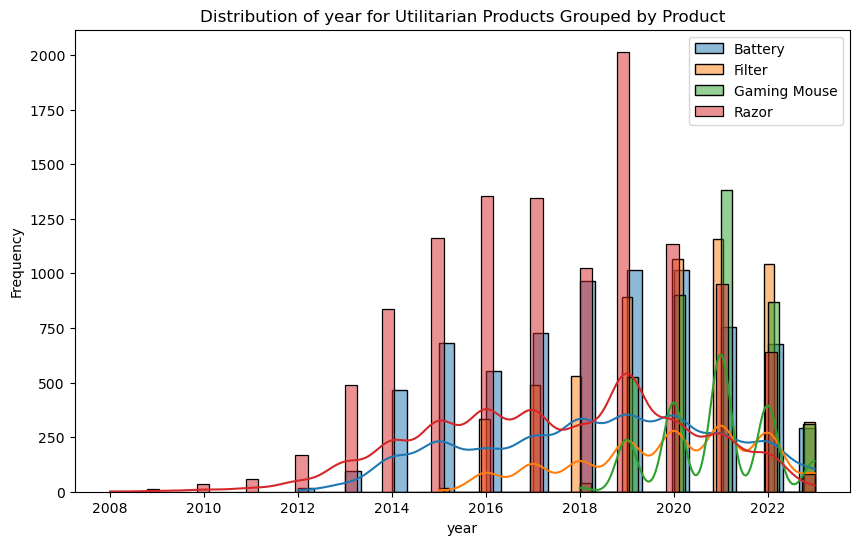

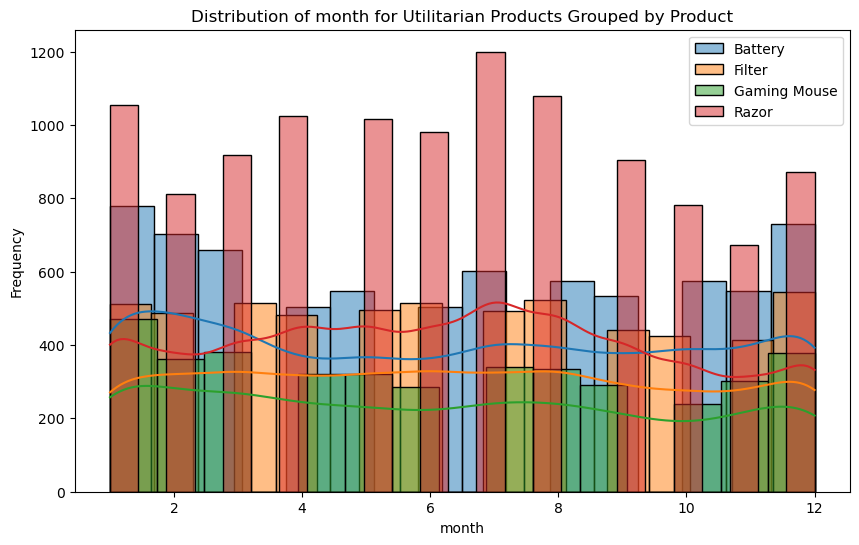

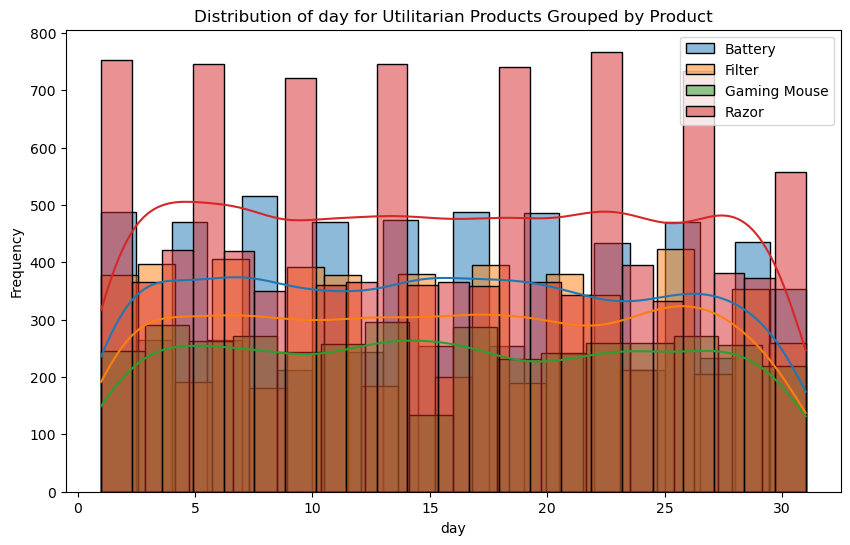

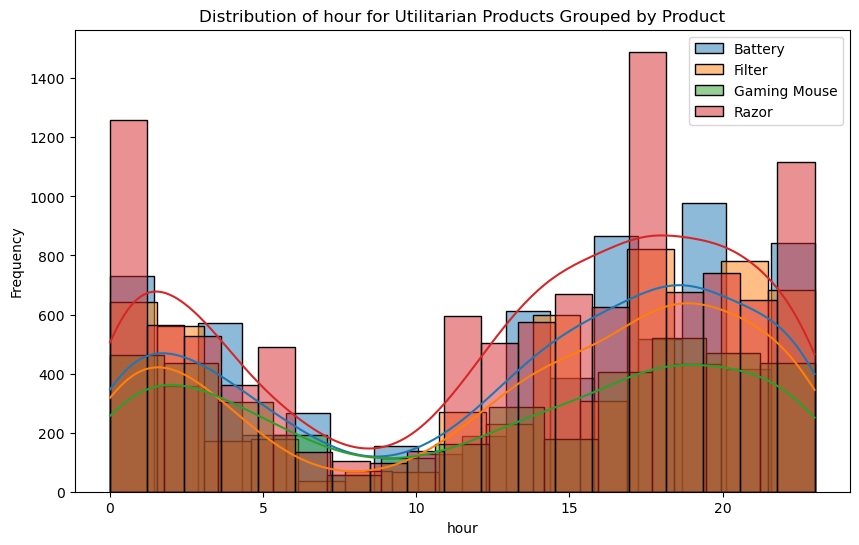

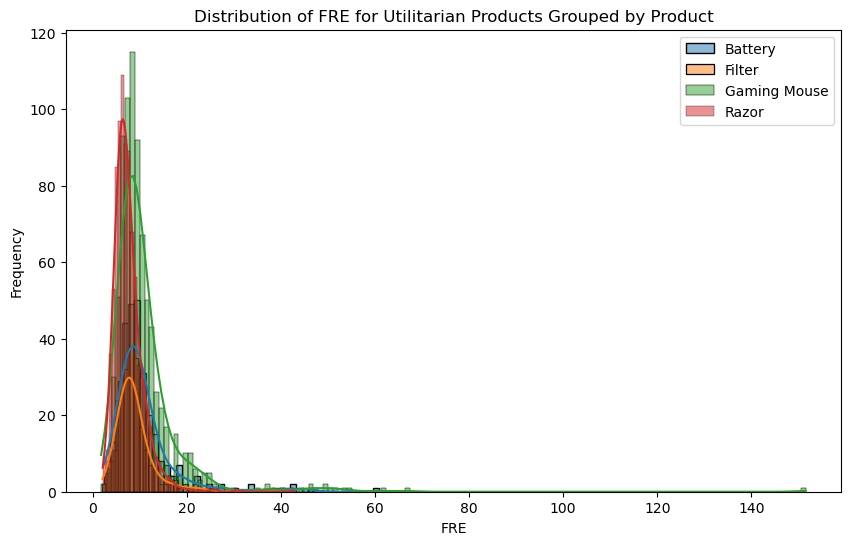

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features of interest
features = features = [
    'rating', 'average_rating','rat_count','ver_purch', 'sentiment', 'price', '#adj', '#adv',
    '#nouns', 'word_count', 'sent_count', 'sent_length', 
    'title_length', 'review_ext', 'elap_days', 
    'image', 'year', 'month', 'day', 'hour','FRE'
]

# Subset the data to include only hedonic products
utilitarian_data = data_utilitarian[data_utilitarian['helpful_vote'] != 0]

# Group the data by product
grouped_data = data_utilitarian.groupby('product')

# Visualize the distribution of each feature for hedonic products grouped by product
for feature in features:
    plt.figure(figsize=(10, 6))
    
    # Loop through each unique product
    for product, group in grouped_data:
        sns.histplot(group[feature], kde=True, label=product)
    
    plt.title(f'Distribution of {feature} for Utilitarian Products Grouped by Product')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
